Problem 3

In [1]:
import geopandas as gpd

bg_url = "https://www2.census.gov/geo/tiger/TIGER2023/BG/tl_2023_17_bg.zip"

block_groups = gpd.read_file(bg_url)
print("Total Illinois block groups:", len(block_groups))
print(block_groups.head(3)[["GEOID", "COUNTYFP", "TRACTCE", "BLKGRPCE"]])

Total Illinois block groups: 9898
          GEOID COUNTYFP TRACTCE BLKGRPCE
0  170190008001      019  000800        1
1  170190106042      019  010604        2
2  170619738001      061  973800        1


In [2]:
cook_bg = block_groups[block_groups["COUNTYFP"] == "031"]
print("Cook County block groups:", len(cook_bg))
cook_bg.head()

Cook County block groups: 4002


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
4,17,031,400500,2,170314005002,1500000US170314005002,Block Group 2,G5030,S,136542,0,+41.7890538,-087.6228061,"POLYGON ((-87.62556 41.78919, -87.62524 41.789..."
5,17,031,480400,6,170314804006,1500000US170314804006,Block Group 6,G5030,S,229016,0,+41.7306299,-087.5787101,"POLYGON ((-87.58553 41.73145, -87.5853 41.7314..."
6,17,031,480400,7,170314804007,1500000US170314804007,Block Group 7,G5030,S,232476,0,+41.7324658,-087.5788122,"POLYGON ((-87.58557 41.73328, -87.58534 41.733..."
7,17,031,060800,4,170310608004,1500000US170310608004,Block Group 4,G5030,S,45144,0,+41.9530301,-087.6469080,"POLYGON ((-87.64794 41.95459, -87.64768 41.954..."
8,17,031,290900,1,170312909001,1500000US170312909001,Block Group 1,G5030,S,164717,0,+41.8643125,-087.7275607,"POLYGON ((-87.73006 41.8661, -87.72982 41.8661..."


In [3]:
community_areas = gpd.read_file("community_areas.geojson")

print("Number of Community Areas:", len(community_areas))
print(community_areas.columns)
print(community_areas.head(3))

#community_areas.plot(edgecolor='black', figsize=(10, 10))

Number of Community Areas: 77
Index([':id', ':version', ':created_at', ':updated_at', 'area_numbe',
       'community', 'area_num_1', 'shape_area', 'shape_len', 'geometry'],
      dtype='object')
                  :id           :version                      :created_at  \
0  row-m77e_pkv8.vjvf  rv-3hjp_vkhx~fqfx 2025-04-22 23:06:36.944000+00:00   
1  row-u375_347e-y6q8  rv-tgcx_t7fr-nkkg 2025-04-22 23:06:36.944000+00:00   
2  row-kgqf-m29p-99kg  rv-bag4-8zri.nvhu 2025-04-22 23:06:36.944000+00:00   

                       :updated_at area_numbe    community area_num_1  \
0 2025-04-22 23:06:36.944000+00:00          1  ROGERS PARK          1   
1 2025-04-22 23:06:36.944000+00:00          2   WEST RIDGE          2   
2 2025-04-22 23:06:36.944000+00:00          3       UPTOWN          3   

      shape_area      shape_len  \
0  51259902.4506  34052.3975757   
1  98429094.8621  43020.6894583   
2  65095642.7289  46972.7945549   

                                            geometry  
0  MUL

In [4]:
community_areas['area_numbe'] = community_areas['area_numbe'].astype(int)

bg_with_ca = gpd.sjoin(
    block_groups,
    community_areas[['area_numbe', 'community', 'geometry']],
    how='left',
    predicate='intersects'
)

my_ca_number = 74
bg_my_ca = bg_with_ca[bg_with_ca['area_numbe'] == my_ca_number]

print(f"Number of block groups in CA {my_ca_number} ({community_areas.loc[community_areas['area_numbe']==my_ca_number, 'community'].values[0]}): {len(bg_my_ca)}")
bg_my_ca.head(3)

C:\Users\ikemo\AppData\Local\Temp\ipykernel_27020\2854792127.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  bg_with_ca = gpd.sjoin(


Number of block groups in CA 74 (MOUNT GREENWOOD): 39


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,index_right,area_numbe,community
1759,17,031,740300,1,170317403001,1500000US170317403001,Block Group 1,G5030,S,243632,0,+41.6931305,-087.7167589,"POLYGON ((-87.72052 41.69485, -87.72032 41.694...",73.0,74.0,MOUNT GREENWOOD
3075,17,031,740400,2,170317404002,1500000US170317404002,Block Group 2,G5030,S,307809,0,+41.6864745,-087.7043035,"POLYGON ((-87.70806 41.68852, -87.70805 41.688...",73.0,74.0,MOUNT GREENWOOD
3588,17,031,823304,4,170318233044,1500000US170318233044,Block Group 4,G5030,S,313073,0,+41.6794520,-087.7138661,"POLYGON ((-87.71623 41.68037, -87.71599 41.680...",73.0,74.0,MOUNT GREENWOOD


Get more block groups from beverly CA72

In [5]:
my_ca_number = 74
neighbor_ca_number = 72

bg_beverly = bg_with_ca[bg_with_ca['area_numbe'] == neighbor_ca_number]

bg_beverly = bg_beverly.to_crs(bg_my_ca.crs)

print(f"Number of Beverly block groups: {len(bg_beverly)}")
bg_beverly.head(3)

Number of Beverly block groups: 38


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,index_right,area_numbe,community
2063,17,031,700502,1,170317005021,1500000US170317005021,Block Group 1,G5030,S,1122348,0,+41.7391666,-087.6843649,"POLYGON ((-87.69554 41.74217, -87.69442 41.742...",71.0,72.0,BEVERLY
2767,17,031,720300,1,170317203001,1500000US170317203001,Block Group 1,G5030,S,245523,0,+41.7156354,-087.6734220,"POLYGON ((-87.67479 41.72107, -87.67471 41.721...",71.0,72.0,BEVERLY
5673,17,031,720100,2,170317201002,1500000US170317201002,Block Group 2,G5030,S,1086828,0,+41.7306402,-087.6762933,"POLYGON ((-87.68251 41.73552, -87.68152 41.735...",71.0,72.0,BEVERLY


In [6]:
import pandas as pd

current_union = bg_my_ca.union_all()
added_bg = gpd.GeoDataFrame(columns=bg_beverly.columns)
remaining_bg = bg_beverly.copy()

while len(added_bg) < 21 and not remaining_bg.empty:
    touching = remaining_bg[remaining_bg.geometry.touches(current_union)]
    
    if touching.empty:
        break
    
    added_bg = pd.concat([added_bg, touching], ignore_index=True)
    current_union = current_union.union(touching.union_all())
    remaining_bg = remaining_bg.drop(touching.index)

print(f"Number of Beverly block groups added: {len(added_bg)}")
added_bg.head(3)

Number of Beverly block groups added: 27


C:\Users\ikemo\AppData\Local\Temp\ipykernel_27020\534219856.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  added_bg = pd.concat([added_bg, touching], ignore_index=True)


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,index_right,area_numbe,community
0,17,031,720500,2,170317205002,1500000US170317205002,Block Group 2,G5030,S,393785,0,+41.7024446,-087.6844742,"POLYGON ((-87.6882 41.70268, -87.68807 41.7026...",71.0,72.0,BEVERLY
1,17,031,821900,2,170318219002,1500000US170318219002,Block Group 2,G5030,S,294462,0,+41.7140272,-087.6942394,"POLYGON ((-87.69723 41.71716, -87.69714 41.717...",71.0,72.0,BEVERLY
2,17,031,720400,2,170317204002,1500000US170317204002,Block Group 2,G5030,S,329613,0,+41.7099686,-087.6891562,"POLYGON ((-87.69173 41.71357, -87.69148 41.713...",71.0,72.0,BEVERLY


In [7]:
bg_expanded = pd.concat([bg_my_ca, added_bg], ignore_index=True)
bg_expanded.reset_index(drop=True, inplace=True)
bg_expanded.to_file("mt_greenwood_expanded_final.geojson", driver="GeoJSON")

print(f"Total block groups after expansion: {len(bg_expanded)}")

Total block groups after expansion: 66


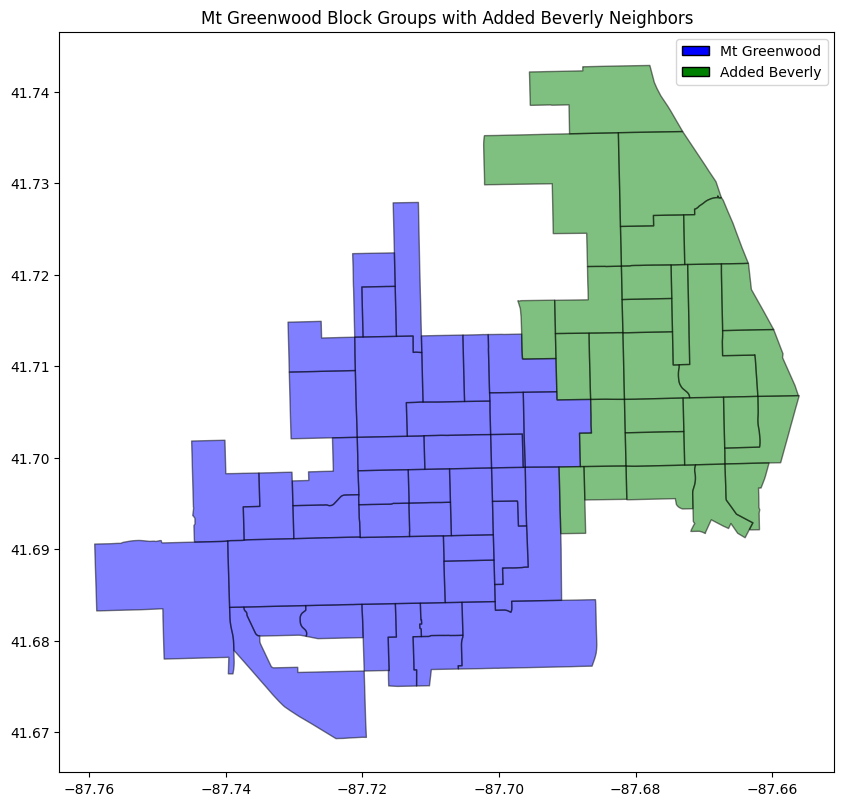

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(10, 10))

bg_my_ca.plot(ax=ax, color='blue', alpha=0.5, edgecolor='black')
added_bg.plot(ax=ax, color='green', alpha=0.5, edgecolor='black')
legend_elements = [
    Patch(facecolor='blue', edgecolor='black', label='Mt Greenwood'),
    Patch(facecolor='green', edgecolor='black', label='Added Beverly')
]
ax.legend(handles=legend_elements)

plt.title("Mt Greenwood Block Groups with Added Beverly Neighbors")
plt.show()

In [9]:
import geopandas as gpd
import pandas as pd
import numpy as np

input_path = "mt_greenwood_expanded.geojson"

bg = gpd.read_file(input_path)
print("Loaded file:", input_path)
print("Rows (candidate nodes):", len(bg))

geoid_cols = [c for c in bg.columns if 'GEOID' in c.upper()]
print("GEOID-like columns found:", geoid_cols)

if not geoid_cols:
    needed = ['state','county','tract','block group']
    if all(x in bg.columns for x in needed):
        def make_geoid(row):
            return str(row['state']).zfill(2) + str(row['county']).zfill(3) + str(row['tract']).zfill(6) + str(row['block group']).zfill(1)
        bg['GEOID'] = bg.apply(make_geoid, axis=1)
        geoid_cols = ['GEOID']
        print("Created GEOID from state/county/tract/block group.")
    else:
        raise RuntimeError("No GEOID column found and cannot create one automatically. Please tell me the column that uniquely identifies block groups.")

geoid_col = geoid_cols[0]
bg['node_id'] = bg[geoid_col].astype(str)
print("Using node_id from column:", geoid_col)

if bg.geometry.is_valid.all():
    print("All geometries valid.")
else:
    print("Warning: some geometries invalid — consider bg = bg.buffer(0) to fix simple issues.")

print("CRS:", bg.crs)
print("Columns (sample):", bg.columns.tolist()[:30])

display(bg.head(6))
bg_expanded = bg.copy()

Loaded file: mt_greenwood_expanded.geojson
Rows (candidate nodes): 66
GEOID-like columns found: ['GEOID', 'GEOIDFQ']
Using node_id from column: GEOID
All geometries valid.
CRS: EPSG:4326
Columns (sample): ['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID', 'GEOIDFQ', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'index_right', 'area_numbe', 'community', 'geometry', 'node_id']


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,index_right,area_numbe,community,geometry,node_id
0,17,031,740300,1,170317403001,1500000US170317403001,Block Group 1,G5030,S,243632,0,+41.6931305,-087.7167589,73.0,74.0,MOUNT GREENWOOD,"POLYGON ((-87.72052 41.69485, -87.72032 41.694...",170317403001
1,17,031,740400,2,170317404002,1500000US170317404002,Block Group 2,G5030,S,307809,0,+41.6864745,-087.7043035,73.0,74.0,MOUNT GREENWOOD,"POLYGON ((-87.70806 41.68852, -87.70805 41.688...",170317404002
2,17,031,823304,4,170318233044,1500000US170318233044,Block Group 4,G5030,S,313073,0,+41.6794520,-087.7138661,73.0,74.0,MOUNT GREENWOOD,"POLYGON ((-87.71623 41.68037, -87.71599 41.680...",170318233044
3,17,031,740400,1,170317404001,1500000US170317404001,Block Group 1,G5030,S,187455,0,+41.6901259,-087.7044310,73.0,74.0,MOUNT GREENWOOD,"POLYGON ((-87.70816 41.69144, -87.70791 41.691...",170317404001
4,17,031,740100,3,170317401003,1500000US170317401003,Block Group 3,G5030,S,197191,0,+41.6965895,-087.6982579,73.0,74.0,MOUNT GREENWOOD,"POLYGON ((-87.70108 41.69887, -87.70085 41.698...",170317401003
5,17,031,740200,4,170317402004,1500000US170317402004,Block Group 4,G5030,S,414614,0,+41.7042761,-087.7073959,73.0,74.0,MOUNT GREENWOOD,"POLYGON ((-87.71357 41.70602, -87.7133 41.7060...",170317402004


In [10]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

gdf = gpd.read_file("mt_greenwood_expanded.geojson")
gdf = gdf.to_crs(epsg=4326)
gdf["geometry"] = gdf["geometry"].buffer(0)

edges = []
for i, geom_i in gdf.geometry.items():
    for j, geom_j in gdf.geometry.items():
        if i < j and geom_i.touches(geom_j): 
            edges.append((gdf.loc[i, "GEOID"], gdf.loc[j, "GEOID"]))

edges_df = pd.DataFrame(edges, columns=["source", "target"])
print(f"Total edges found: {len(edges_df)}")
print(edges_df.head(5))

Total edges found: 175
         source        target
0  170317403001  170318228023
1  170317403001  170317403003
2  170317403001  170317403004
3  170317403001  170317403005
4  170317403001  170317404003


Graph built — 66 nodes and 175 edges

Network summary:
Average degree: 5.30
Number of connected components: 1


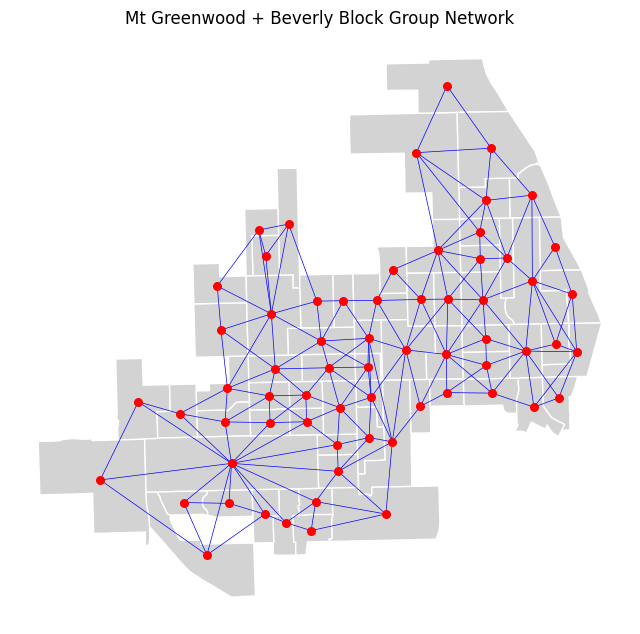

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(gdf["GEOID"])
G.add_edges_from(edges_df.values)

print(f"Graph built — {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

print("\nNetwork summary:")
print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
print(f"Number of connected components: {nx.number_connected_components(G)}")

fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, color="lightgrey", edgecolor="white")

pos = {row["GEOID"]: (row.geometry.centroid.x, row.geometry.centroid.y) for _, row in gdf.iterrows()}
nx.draw(G, pos, node_size=30, node_color="red", edge_color="blue", width=0.5, ax=ax)

plt.title("Mt Greenwood + Beverly Block Group Network", fontsize=12)
plt.show()

In [12]:
import requests
import pandas as pd
import numpy as np

acs_vars = {
    "B01003_001E": "total_population",
    "B01002_001E": "median_age",
    "B19013_001E": "median_household_income",
    "B23025_005E": "unemployed",
    "B23025_003E": "in_labor_force",
    "B25077_001E": "median_home_value",
    "B08303_001E": "mean_travel_time_work",
    "B02001_001E": "total_pop_race",
    "B02001_002E": "white_alone",
    "B02001_003E": "black_alone",
    "B02001_004E": "asian_alone",
    "B03003_003E": "hispanic_latino",
}

var_string = ",".join(acs_vars.keys())
url = (
    f"https://api.census.gov/data/2023/acs/acs5?"
    f"get={var_string}"
    f"&for=block%20group:*"
    f"&in=state:17+county:031"
)

print("Fetching ACS data...")
response = requests.get(url)

if response.status_code == 200:
    result = response.json()
    acs_data = pd.DataFrame(result[1:], columns=result[0])
    
    acs_data['GEOID'] = (
        acs_data['state'] + 
        acs_data['county'] + 
        acs_data['tract'] + 
        acs_data['block group']
    )
    
    acs_data.rename(columns=acs_vars, inplace=True)
    
    for col in acs_vars.values():
        acs_data[col] = pd.to_numeric(acs_data[col], errors='coerce')
    
    numeric_cols = list(acs_vars.values())
    for col in numeric_cols:
        acs_data.loc[acs_data[col] < 0, col] = np.nan
    
    geoids = bg_expanded['GEOID'].tolist()
    acs_data = acs_data[acs_data['GEOID'].isin(geoids)].copy()
    
    print(f"Fetched data for {len(acs_data)} block groups")
    
    # --- Calculate derived metrics ---
    
    # 1. Unemployment rate (%)
    acs_data['unemployment_rate'] = (
        acs_data['unemployed'] / acs_data['in_labor_force'] * 100
    )
    
    # 2. Race/ethnicity percentages
    acs_data['pct_white'] = (acs_data['white_alone'] / acs_data['total_pop_race'] * 100)
    acs_data['pct_black'] = (acs_data['black_alone'] / acs_data['total_pop_race'] * 100)
    acs_data['pct_asian'] = (acs_data['asian_alone'] / acs_data['total_pop_race'] * 100)
    acs_data['pct_hispanic'] = (acs_data['hispanic_latino'] / acs_data['total_pop_race'] * 100)
    
    # 3. Diversity Index (Simpson's Diversity Index)
    acs_data['diversity_index'] = 1 - (
        (acs_data['pct_white']/100)**2 + 
        (acs_data['pct_black']/100)**2 + 
        (acs_data['pct_asian']/100)**2 + 
        (acs_data['pct_hispanic']/100)**2
    )
    
    # --- Select final 7 variables ---
    final_vars = [
        'GEOID',
        'total_population',
        'diversity_index',
        'median_age',
        'median_household_income',
        'unemployment_rate',
        'median_home_value',
        'mean_travel_time_work'
    ]
    
    acs_clean = acs_data[final_vars].copy()
    
    print("\nMissing values per variable:")
    missing_counts = acs_clean.isnull().sum()
    print(missing_counts)
    
    if acs_clean['median_household_income'].isnull().any():
        n_missing = acs_clean['median_household_income'].isnull().sum()
        median_income = acs_clean['median_household_income'].median()
        acs_clean.loc[:, 'median_household_income'] = acs_clean['median_household_income'].fillna(median_income)
        print(f"\n🔧 Imputed {n_missing} missing income values with median: ${median_income:,.0f}")
    
    print("\nFinal missing value check:")
    print(acs_clean.isnull().sum())
    
    print("\nFinal summary statistics:")
    print(acs_clean.describe())
    
    print("\nSample data (first 5 rows):")
    print(acs_clean.head())
    
    print("\nValue range check:")
    for col in final_vars[1:]:  
        min_val = acs_clean[col].min()
        max_val = acs_clean[col].max()
        print(f"{col}: [{min_val:.2f}, {max_val:.2f}]")
    
    bg_with_acs = bg_expanded.merge(acs_clean, on='GEOID', how='left')
    print(f"\nMerged ACS data with {len(bg_with_acs)} block groups")
    
    print("\nSample of merged data:")
    print(bg_with_acs[['GEOID', 'area_numbe', 'community', 'total_population', 
                       'median_household_income', 'median_home_value']].head())
    
    bg_with_acs.to_file("mt_greenwood_with_acs.geojson", driver="GeoJSON")
    print("\nSaved to: mt_greenwood_with_acs.geojson")
    

    print("1. Total Population")
    print("2. Diversity Index (race/ethnicity)")
    print("3. Median Age")
    print("4. Median Household Income")
    print("5. Unemployment Rate")
    print("6. Median Home Value")
    print("7. Mean Travel Time to Work")
    
else:
    print(f"API request failed with status code: {response.status_code}")
    print(f"Response: {response.text}")

Fetching ACS data...
Fetched data for 66 block groups

Missing values per variable:
GEOID                      0
total_population           0
diversity_index            0
median_age                 0
median_household_income    3
unemployment_rate          0
median_home_value          0
mean_travel_time_work      0
dtype: int64

🔧 Imputed 3 missing income values with median: $112,583

Final missing value check:
GEOID                      0
total_population           0
diversity_index            0
median_age                 0
median_household_income    0
unemployment_rate          0
median_home_value          0
mean_travel_time_work      0
dtype: int64

Final summary statistics:
       total_population  diversity_index  median_age  median_household_income  \
count         66.000000        66.000000   66.000000                66.000000   
mean        1086.909091         0.356059   41.586364            111379.393939   
std          500.985605         0.189088    7.635905             35832.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import networkx as nx

feature_cols = [
    'total_population',
    'diversity_index',
    'median_age',
    'median_household_income',
    'unemployment_rate',
    'median_home_value',
    'mean_travel_time_work'
]

X = bg_with_acs[feature_cols].values
geoids = bg_with_acs['GEOID'].values

print(f"Feature matrix shape: {X.shape} (66 block groups × 7 variables)")

# --- Step 2: Standardize to z-scores ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Standardized features (mean=0, std=1)")
print(f"Mean of scaled features: {X_scaled.mean(axis=0).round(10)}")
print(f"Std of scaled features: {X_scaled.std(axis=0).round(2)}")

# --- Step 3: Calculate cosine similarity matrix ---
similarity_matrix = cosine_similarity(X_scaled)

print(f"\nSimilarity matrix computed: {similarity_matrix.shape}")
print(f"   Similarity range: [{similarity_matrix.min():.3f}, {similarity_matrix.max():.3f}]")
print(f"   Mean similarity: {similarity_matrix.mean():.3f}")

# --- Step 4: Create edges based on similarity threshold ---
threshold = 0.8  

edges_similarity = []
edge_weights = []

for i in range(len(geoids)):
    for j in range(i + 1, len(geoids)):
        sim = similarity_matrix[i, j]
        if sim >= threshold:
            edges_similarity.append((geoids[i], geoids[j]))
            edge_weights.append(sim)

print(f"\nCreated {len(edges_similarity)} edges with similarity ≥ {threshold}")

# --- Step 5: Build similarity network ---
G_similarity = nx.Graph()
G_similarity.add_nodes_from(geoids)
G_similarity.add_weighted_edges_from([
    (edges_similarity[i][0], edges_similarity[i][1], edge_weights[i])
    for i in range(len(edges_similarity))
])

print(f"\nSimilarity Network Summary:")
print(f"   Nodes: {G_similarity.number_of_nodes()}")
print(f"   Edges: {G_similarity.number_of_edges()}")
print(f"   Density: {nx.density(G_similarity):.3f}")
print(f"   Connected components: {nx.number_connected_components(G_similarity)}")

if G_similarity.number_of_edges() > 0:
    avg_degree = 2 * G_similarity.number_of_edges() / G_similarity.number_of_nodes()
    print(f"   Average degree: {avg_degree:.2f}")
else:
    print(" No edges created - threshold may be too high!")

# --- Step 6: Identify isolated vs connected nodes ---
isolated = list(nx.isolates(G_similarity))
print(f"\nIsolated nodes (no similar neighbors): {len(isolated)}")

if len(isolated) > 0 and len(isolated) <= 10:
    print("   Isolated GEOIDs:", isolated[:10])

# --- Step 7: Try different thresholds to see edge counts ---
print("\nEdges at different similarity thresholds:")
for thresh in [0.95, 0.90, 0.85, 0.80, 0.75, 0.70]:
    n_edges = sum(1 for i in range(len(geoids)) 
                  for j in range(i+1, len(geoids)) 
                  if similarity_matrix[i, j] >= thresh)
    print(f"Threshold {thresh}: {n_edges} edges")

Feature matrix shape: (66, 7) (66 block groups × 7 variables)
Standardized features (mean=0, std=1)
Mean of scaled features: [-0. -0.  0.  0.  0.  0.  0.]
Std of scaled features: [1. 1. 1. 1. 1. 1. 1.]

Similarity matrix computed: (66, 66)
   Similarity range: [-0.965, 1.000]
   Mean similarity: 0.007

Created 45 edges with similarity ≥ 0.8

Similarity Network Summary:
   Nodes: 66
   Edges: 45
   Density: 0.021
   Connected components: 30
   Average degree: 1.36

Isolated nodes (no similar neighbors): 18

Edges at different similarity thresholds:
Threshold 0.95: 0 edges
Threshold 0.9: 10 edges
Threshold 0.85: 24 edges
Threshold 0.8: 45 edges
Threshold 0.75: 71 edges
Threshold 0.7: 105 edges


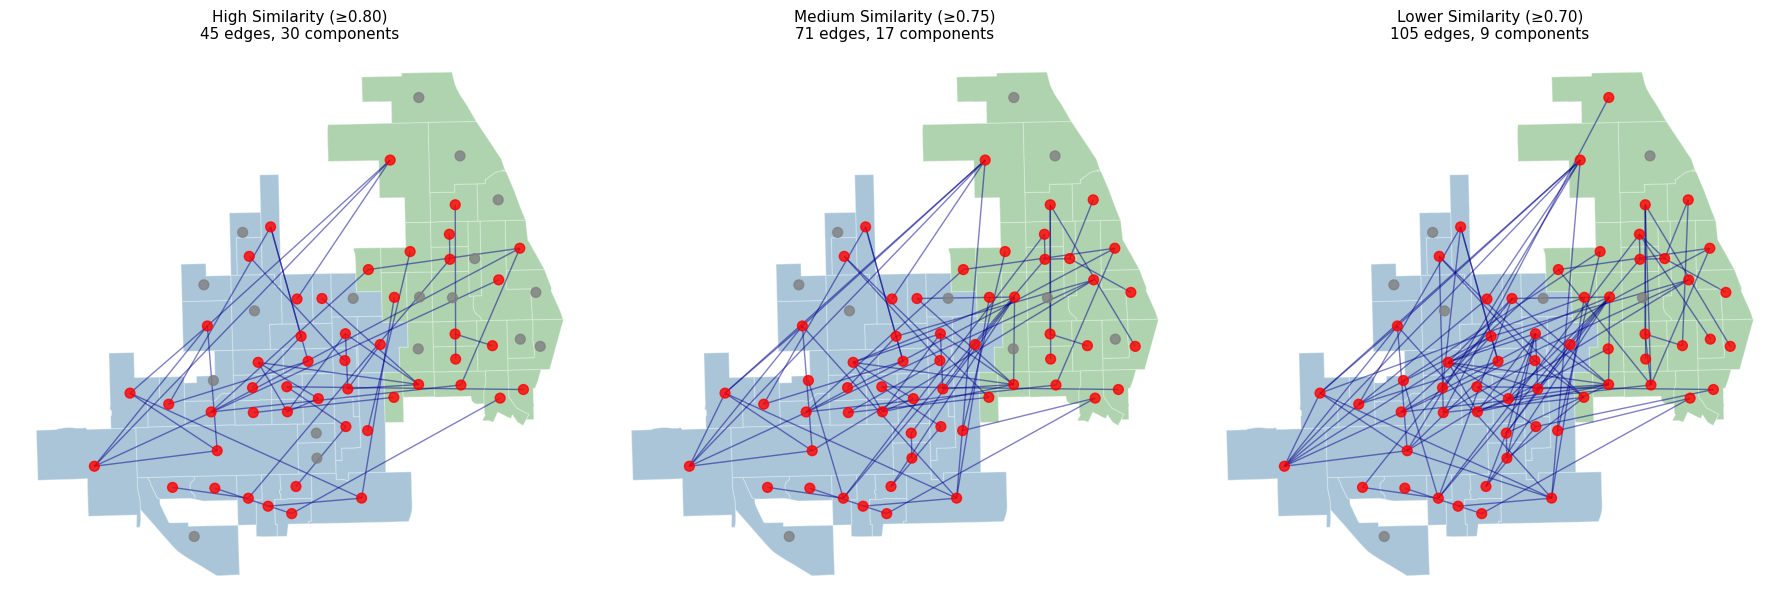

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

thresholds = [0.80, 0.75, 0.70]
titles = ['High Similarity (≥0.80)', 'Medium Similarity (≥0.75)', 'Lower Similarity (≥0.70)']

for idx, (thresh, title) in enumerate(zip(thresholds, titles)):
    ax = axes[idx]
    
    edges_temp = []
    for i in range(len(geoids)):
        for j in range(i + 1, len(geoids)):
            if similarity_matrix[i, j] >= thresh:
                edges_temp.append((geoids[i], geoids[j]))
    
    G_temp = nx.Graph()
    G_temp.add_nodes_from(geoids)
    G_temp.add_edges_from(edges_temp)
    
    bg_with_acs.plot(ax=ax, color='lightgray', edgecolor='white', alpha=0.5)
    
    colors = ['#1f77b4' if ca == 74 else '#2ca02c' 
              for ca in bg_with_acs['area_numbe']]
    bg_with_acs.plot(ax=ax, color=colors, alpha=0.3, edgecolor='white', linewidth=0.5)
    
    pos = {row["GEOID"]: (row.geometry.centroid.x, row.geometry.centroid.y) 
           for _, row in bg_with_acs.iterrows()}
    
    node_colors = ['red' if G_temp.degree(node) > 0 else 'gray' 
                   for node in G_temp.nodes()]
    
    nx.draw_networkx_nodes(G_temp, pos, node_size=50, 
                           node_color=node_colors, alpha=0.8, ax=ax)
    nx.draw_networkx_edges(G_temp, pos, edge_color='darkblue', 
                           width=1, alpha=0.5, ax=ax)
    
    ax.set_title(f'{title}\n{G_temp.number_of_edges()} edges, '
                 f'{nx.number_connected_components(G_temp)} components', 
                 fontsize=11)
    ax.axis('off')

plt.tight_layout()
plt.savefig('similarity_network_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
components = list(nx.connected_components(G_similarity))
components_sorted = sorted(components, key=len, reverse=True)

for i, comp in enumerate(components_sorted[:10], 1):  # Top 10
    comp_list = list(comp)
    print(f"\nCluster {i}: {len(comp_list)} block groups")
    
    cluster_data = bg_with_acs[bg_with_acs['GEOID'].isin(comp_list)]
    
    print(f"   Community Areas: {cluster_data['community'].unique()}")
    print(f"   Avg Income: ${cluster_data['median_household_income'].mean():,.0f}")
    print(f"   Avg Home Value: ${cluster_data['median_home_value'].mean():,.0f}")
    print(f"   Avg Diversity: {cluster_data['diversity_index'].mean():.3f}")
    print(f"   GEOIDs: {comp_list}")

print("Cluster Size Distribution:")
sizes = [len(c) for c in components]
print(f"   Largest cluster: {max(sizes)} block groups")
print(f"   Smallest cluster: {min(sizes)} block groups")
print(f"   Average cluster size: {np.mean(sizes):.2f}")
print(f"   Median cluster size: {np.median(sizes):.0f}")
print(f"   Single-node clusters: {sum(1 for s in sizes if s == 1)}")


Cluster 1: 10 block groups
   Community Areas: ['MOUNT GREENWOOD' 'BEVERLY']
   Avg Income: $88,787
   Avg Home Value: $266,140
   Avg Diversity: 0.458
   GEOIDs: ['170318228011', '170318233044', '170318216003', '170318232001', '170317202003', '170317204002', '170318233042', '170318227021', '170317404003', '170318219005']

Cluster 2: 8 block groups
   Community Areas: ['MOUNT GREENWOOD' 'BEVERLY']
   Avg Income: $120,881
   Avg Home Value: $321,500
   Avg Diversity: 0.228
   GEOIDs: ['170317401001', '170317401003', '170317402002', '170318219004', '170317403003', '170317205001', '170317503001', '170317403002']

Cluster 3: 5 block groups
   Community Areas: ['MOUNT GREENWOOD']
   Avg Income: $150,084
   Avg Home Value: $303,380
   Avg Diversity: 0.252
   GEOIDs: ['170318217003', '170317403005', '170318228012', '170317402004', '170317402003']

Cluster 4: 4 block groups
   Community Areas: ['MOUNT GREENWOOD' 'BEVERLY']
   Avg Income: $111,066
   Avg Home Value: $253,450
   Avg Diversity: 

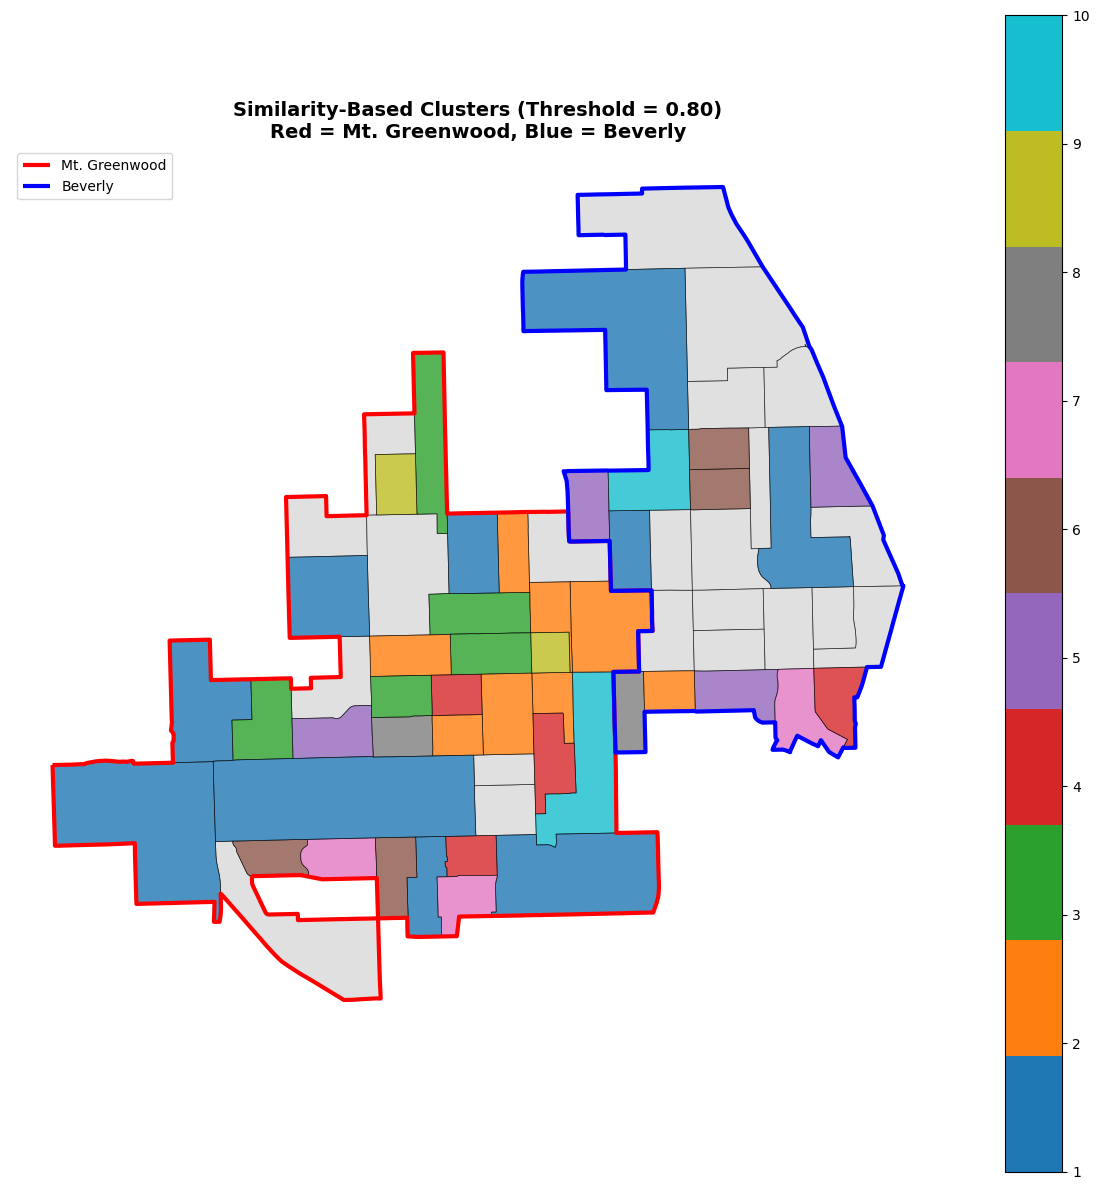

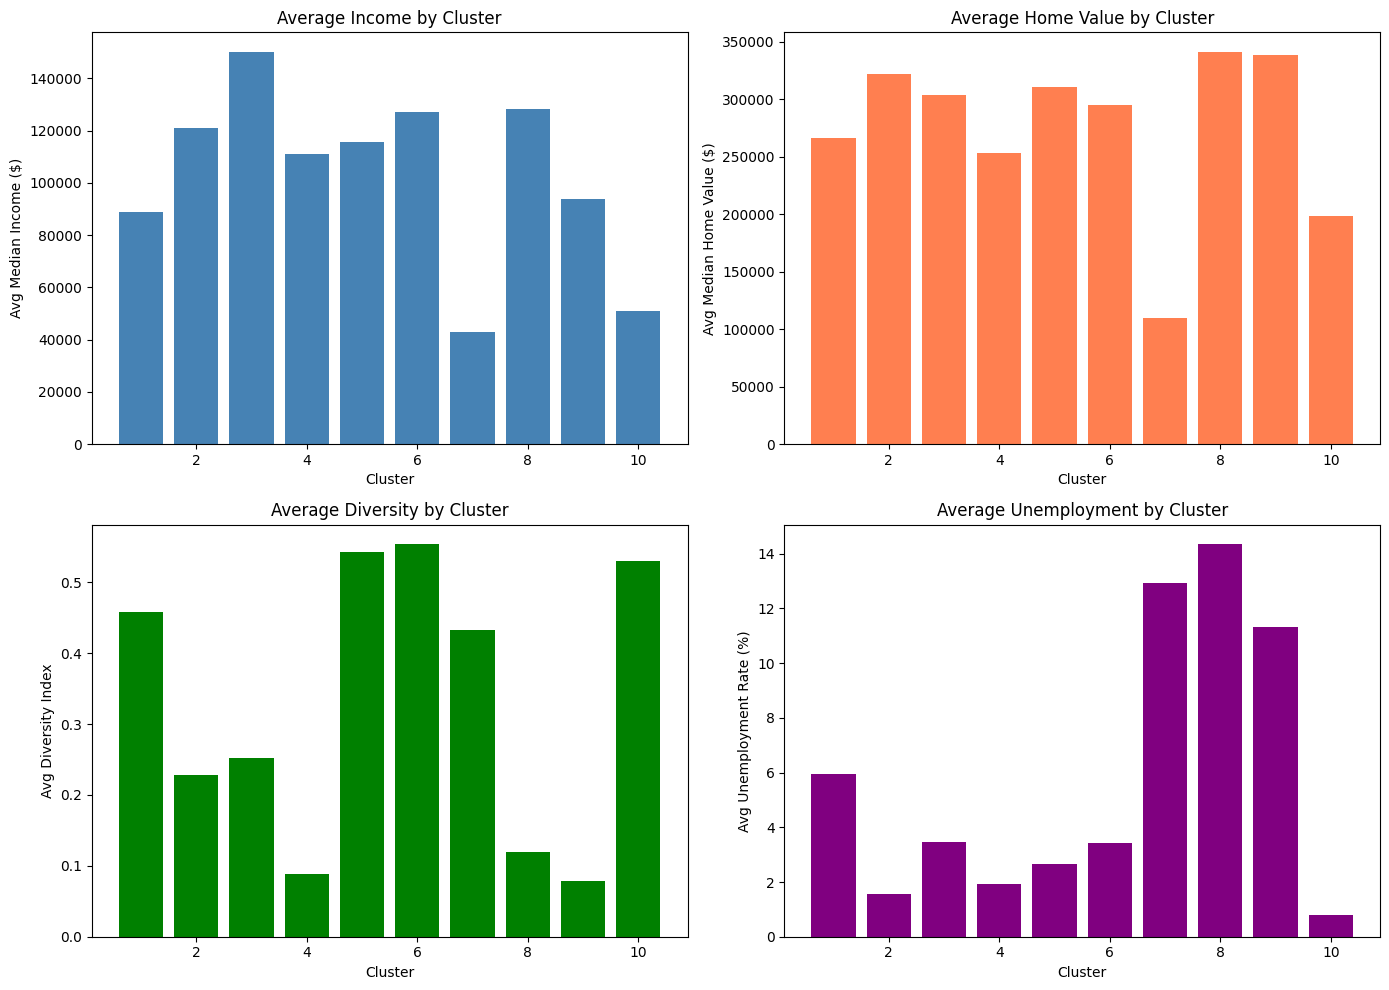

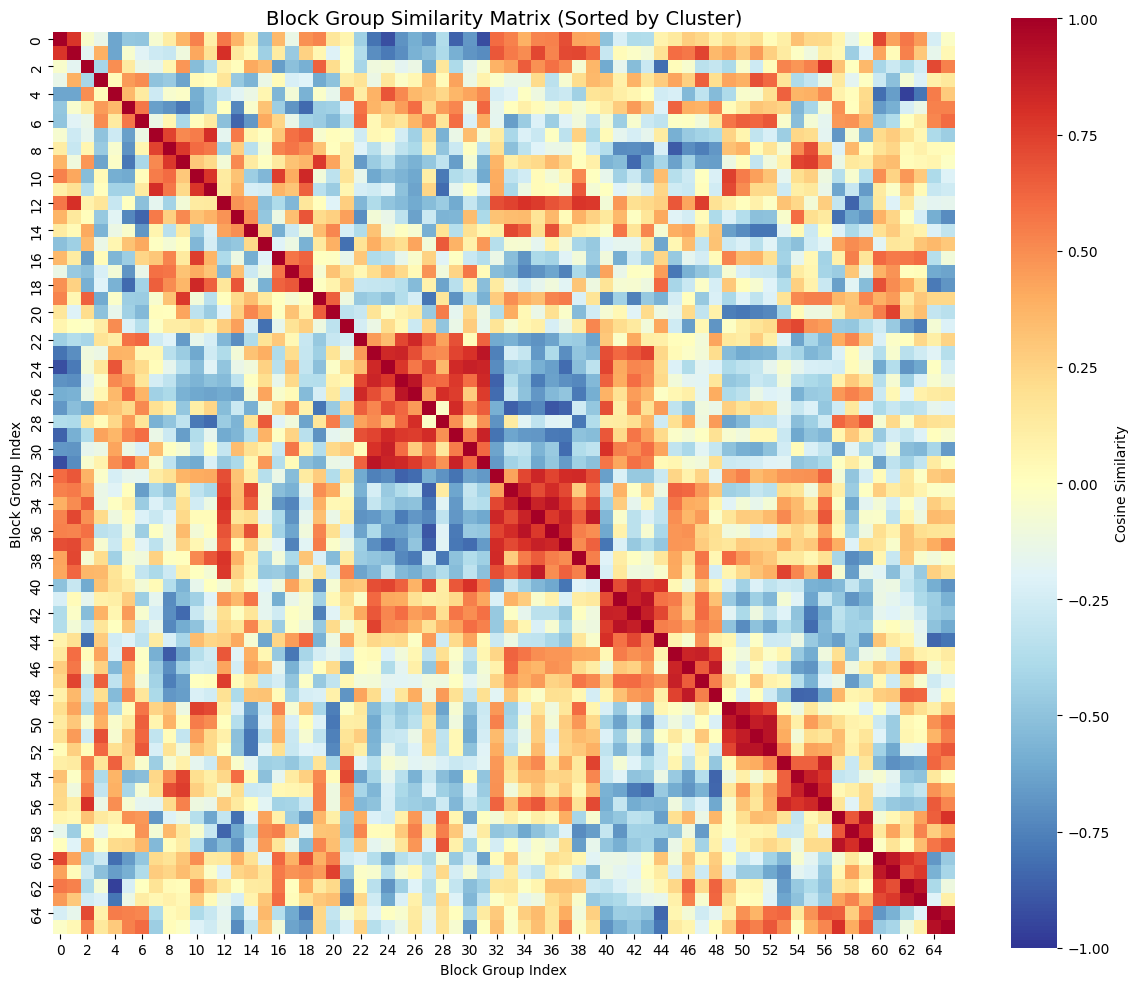

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

component_map = {}
for i, comp in enumerate(components_sorted, 1):
    for geoid in comp:
        component_map[geoid] = i if i <= 10 else 0  # Top 10 clusters, rest = 0

bg_with_acs['cluster'] = bg_with_acs['GEOID'].map(component_map)
bg_with_acs['is_isolated'] = bg_with_acs['cluster'] == 0

fig, ax = plt.subplots(figsize=(12, 12))
isolated_bg = bg_with_acs[bg_with_acs['is_isolated']]
isolated_bg.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5, alpha=0.7)

clustered_bg = bg_with_acs[~bg_with_acs['is_isolated']]
clustered_bg.plot(ax=ax, column='cluster', cmap='tab10', 
                  edgecolor='black', linewidth=0.5, alpha=0.8, legend=True)

ca_74 = bg_with_acs[bg_with_acs['area_numbe'] == 74]
ca_72 = bg_with_acs[bg_with_acs['area_numbe'] == 72]
ca_74.dissolve().boundary.plot(ax=ax, color='red', linewidth=3, label='Mt. Greenwood')
ca_72.dissolve().boundary.plot(ax=ax, color='blue', linewidth=3, label='Beverly')

plt.title('Similarity-Based Clusters (Threshold = 0.80)\nRed = Mt. Greenwood, Blue = Beverly', 
          fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
plt.axis('off')
plt.tight_layout()
plt.savefig('similarity_clusters_map.png', dpi=300, bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

cluster_summary = bg_with_acs[bg_with_acs['cluster'] > 0].groupby('cluster').agg({
    'median_household_income': 'mean',
    'median_home_value': 'mean',
    'diversity_index': 'mean',
    'unemployment_rate': 'mean'
}).reset_index()

axes[0, 0].bar(cluster_summary['cluster'], cluster_summary['median_household_income'], 
               color='steelblue')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Avg Median Income ($)')
axes[0, 0].set_title('Average Income by Cluster')
axes[0, 0].tick_params(axis='x', rotation=0)

axes[0, 1].bar(cluster_summary['cluster'], cluster_summary['median_home_value'], 
               color='coral')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Avg Median Home Value ($)')
axes[0, 1].set_title('Average Home Value by Cluster')

axes[1, 0].bar(cluster_summary['cluster'], cluster_summary['diversity_index'], 
               color='green')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Avg Diversity Index')
axes[1, 0].set_title('Average Diversity by Cluster')

axes[1, 1].bar(cluster_summary['cluster'], cluster_summary['unemployment_rate'], 
               color='purple')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Avg Unemployment Rate (%)')
axes[1, 1].set_title('Average Unemployment by Cluster')

plt.tight_layout()
plt.savefig('cluster_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(12, 10))

bg_sorted = bg_with_acs.sort_values('cluster')
sorted_indices = [list(geoids).index(g) for g in bg_sorted['GEOID']]
similarity_sorted = similarity_matrix[np.ix_(sorted_indices, sorted_indices)]

sns.heatmap(similarity_sorted, cmap='RdYlBu_r', center=0, 
            vmin=-1, vmax=1, square=True, ax=ax,
            cbar_kws={'label': 'Cosine Similarity'})

ax.set_title('Block Group Similarity Matrix (Sorted by Cluster)', fontsize=14)
ax.set_xlabel('Block Group Index')
ax.set_ylabel('Block Group Index')

plt.tight_layout()
plt.savefig('similarity_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
print("\nOVERALL NETWORK CHARACTERISTICS:")
print(f"Total block groups analyzed: {len(bg_with_acs)}")
print(f"From Mt. Greenwood (CA 74): {(bg_with_acs['area_numbe']==74).sum()}")
print(f"From Beverly (CA 72): {(bg_with_acs['area_numbe']==72).sum()}")

print("\nSIMILARITY NETWORK (threshold = 0.80):")
print(f"   Total edges: {G_similarity.number_of_edges()}")
print(f"   Network density: {nx.density(G_similarity):.3f}")
print(f"   Connected components: {nx.number_connected_components(G_similarity)}")
print(f"   Isolated nodes: {len(isolated)} ({len(isolated)/len(bg_with_acs)*100:.1f}%)")
print(f"   Largest cluster size: {max(sizes)} block groups")
print(f"   Average cluster size: {np.mean(sizes):.2f}")

print("\nCLUSTER COMPOSITION:")
mt_greenwood_only = sum(1 for c in components_sorted[:10] 
                        if len(bg_with_acs[bg_with_acs['GEOID'].isin(c)]['community'].unique()) == 1 
                        and 'MOUNT GREENWOOD' in bg_with_acs[bg_with_acs['GEOID'].isin(c)]['community'].unique())
beverly_only = sum(1 for c in components_sorted[:10] 
                   if len(bg_with_acs[bg_with_acs['GEOID'].isin(c)]['community'].unique()) == 1 
                   and 'BEVERLY' in bg_with_acs[bg_with_acs['GEOID'].isin(c)]['community'].unique())
mixed = sum(1 for c in components_sorted[:10] 
            if len(bg_with_acs[bg_with_acs['GEOID'].isin(c)]['community'].unique()) > 1)

print(f"   Top 10 clusters:")
print(f"      Mt. Greenwood only: {mt_greenwood_only}")
print(f"      Beverly only: {beverly_only}")
print(f"      Mixed (both CAs): {mixed}")

print("\n SOCIOECONOMIC VARIATION ACROSS CLUSTERS:")
print(f"   Income range: ${cluster_summary['median_household_income'].min():,.0f} - ${cluster_summary['median_household_income'].max():,.0f}")
print(f"   Income std dev: ${cluster_summary['median_household_income'].std():,.0f}")
print(f"   Diversity range: {cluster_summary['diversity_index'].min():.3f} - {cluster_summary['diversity_index'].max():.3f}")


OVERALL NETWORK CHARACTERISTICS:
Total block groups analyzed: 66
From Mt. Greenwood (CA 74): 39
From Beverly (CA 72): 27

SIMILARITY NETWORK (threshold = 0.80):
   Total edges: 45
   Network density: 0.021
   Connected components: 30
   Isolated nodes: 18 (27.3%)
   Largest cluster size: 10 block groups
   Average cluster size: 2.20

CLUSTER COMPOSITION:
   Top 10 clusters:
      Mt. Greenwood only: 2
      Beverly only: 0
      Mixed (both CAs): 8

 SOCIOECONOMIC VARIATION ACROSS CLUSTERS:
   Income range: $42,870 - $150,084
   Income std dev: $34,312
   Diversity range: 0.078 - 0.553


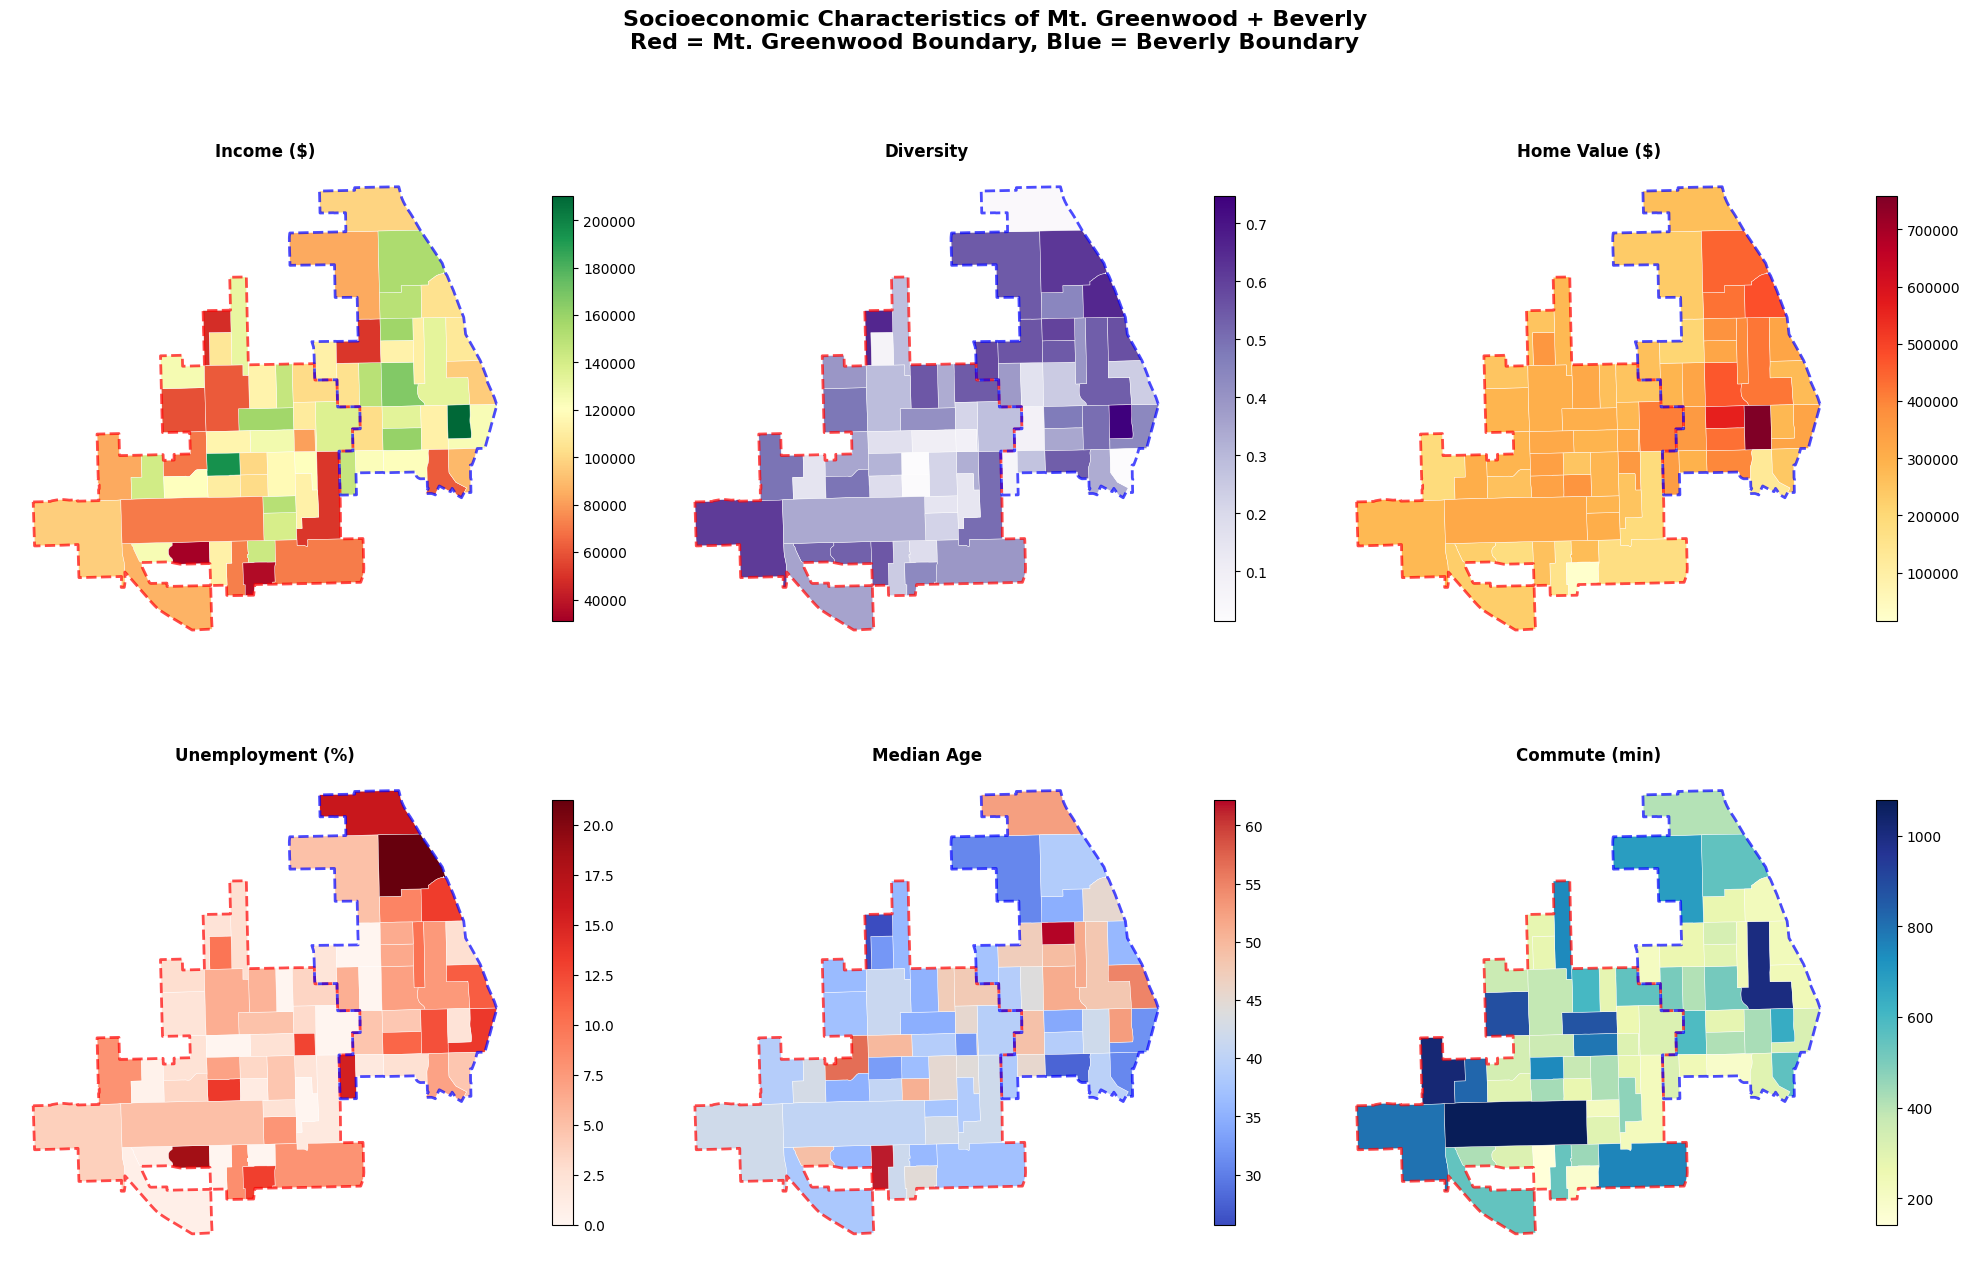

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

variables = [
    ('median_household_income', 'RdYlGn', 'Income ($)'),
    ('diversity_index', 'Purples', 'Diversity'),
    ('median_home_value', 'YlOrRd', 'Home Value ($)'),
    ('unemployment_rate', 'Reds', 'Unemployment (%)'),
    ('median_age', 'coolwarm', 'Median Age'),
    ('mean_travel_time_work', 'YlGnBu', 'Commute (min)')
]

for idx, (var, cmap, title) in enumerate(variables):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    bg_with_acs.plot(column=var, 
                     ax=ax, 
                     cmap=cmap,
                     edgecolor='white', 
                     linewidth=0.3,
                     legend=True,
                     legend_kwds={'shrink': 0.6})
    
    ca_74.dissolve().boundary.plot(ax=ax, color='red', linewidth=2, linestyle='--', alpha=0.7)
    ca_72.dissolve().boundary.plot(ax=ax, color='blue', linewidth=2, linestyle='--', alpha=0.7)
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.axis('off')

plt.suptitle('Socioeconomic Characteristics of Mt. Greenwood + Beverly\n' + 
             'Red = Mt. Greenwood Boundary, Blue = Beverly Boundary', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('choropleth_comparison_all.png', dpi=300, bbox_inches='tight')
plt.show()

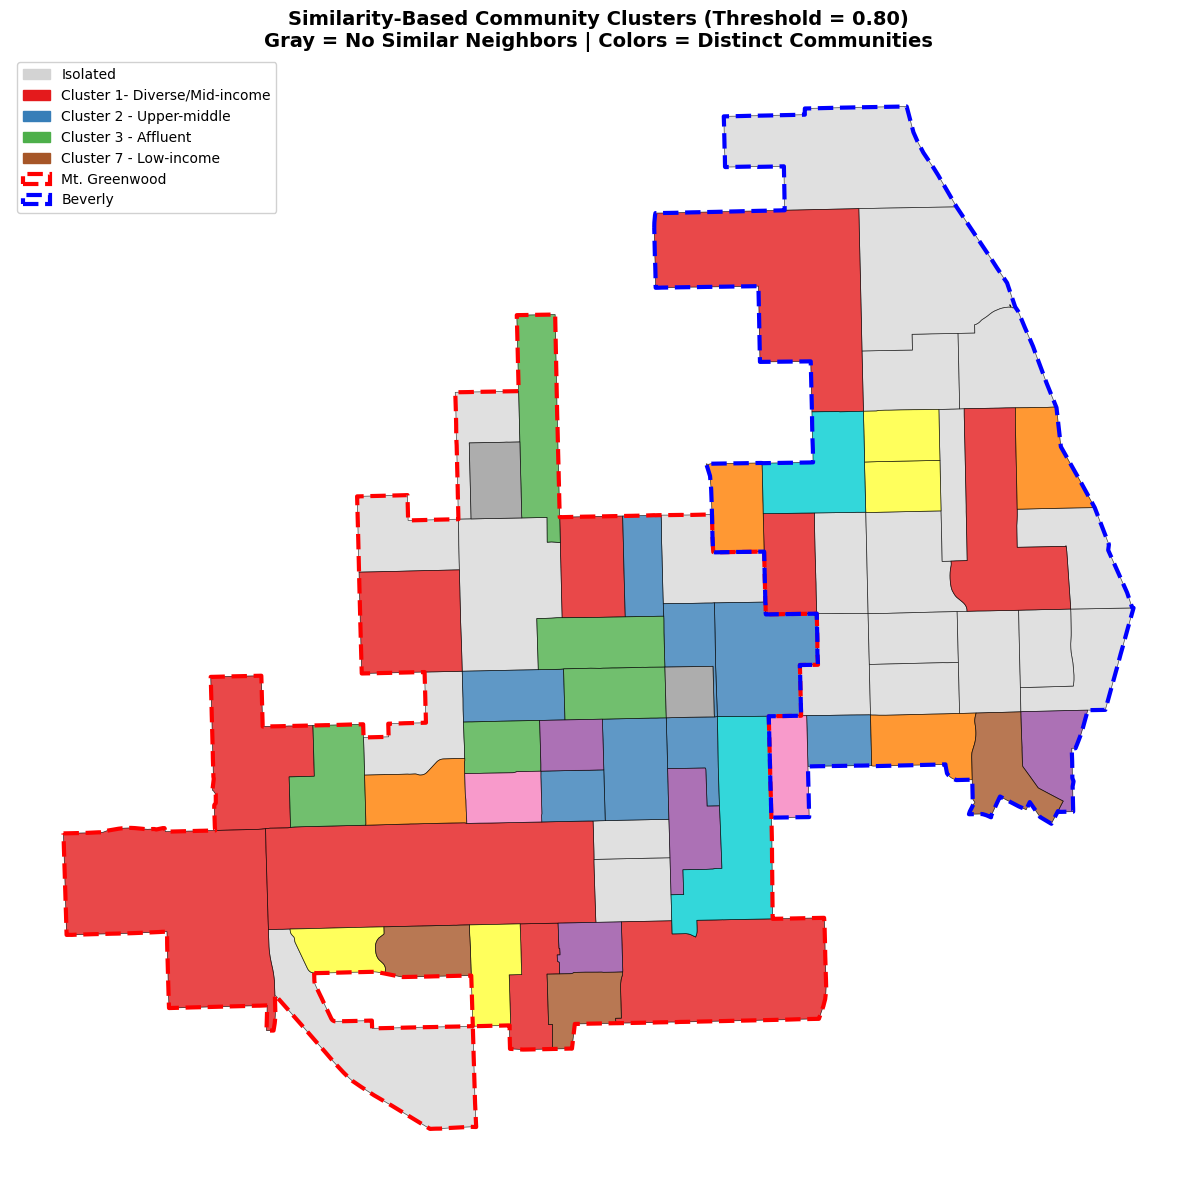

In [19]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(14, 12))

isolated_bg.plot(ax=ax, color='lightgray', edgecolor='black', 
                 linewidth=0.5, alpha=0.7, label='Isolated (no similar neighbors)')

cluster_colors = {
    1: '#e41a1c', 2: '#377eb8', 3: '#4daf4a', 4: '#984ea3', 5: '#ff7f00',
    6: '#ffff33', 7: '#a65628', 8: '#f781bf', 9: '#999999', 10: '#00ced1'
}

for cluster_id in range(1, 11):
    cluster_bg = bg_with_acs[bg_with_acs['cluster'] == cluster_id]
    if not cluster_bg.empty:
        cluster_bg.plot(ax=ax, color=cluster_colors[cluster_id], 
                       edgecolor='black', linewidth=0.5, alpha=0.8,
                       label=f'Cluster {cluster_id} ({len(cluster_bg)} BGs)')

ca_74.dissolve().boundary.plot(ax=ax, color='red', linewidth=3, linestyle='--')
ca_72.dissolve().boundary.plot(ax=ax, color='blue', linewidth=3, linestyle='--')

legend_elements = [
    mpatches.Patch(color='lightgray', label='Isolated'),
    mpatches.Patch(color=cluster_colors[1], label='Cluster 1- Diverse/Mid-income'),
    mpatches.Patch(color=cluster_colors[2], label='Cluster 2 - Upper-middle'),
    mpatches.Patch(color=cluster_colors[3], label='Cluster 3 - Affluent'),
    mpatches.Patch(color=cluster_colors[7], label='Cluster 7 - Low-income'),
    mpatches.Patch(facecolor='none', edgecolor='red', linewidth=3, 
                   linestyle='--', label='Mt. Greenwood'),
    mpatches.Patch(facecolor='none', edgecolor='blue', linewidth=3, 
                   linestyle='--', label='Beverly')
]

ax.legend(handles=legend_elements, loc='upper left', fontsize=10, framealpha=0.9)
plt.title('Similarity-Based Community Clusters (Threshold = 0.80)\n' + 
          'Gray = No Similar Neighbors | Colors = Distinct Communities', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig('choropleth_clusters_annotated.png', dpi=300, bbox_inches='tight')
plt.show()

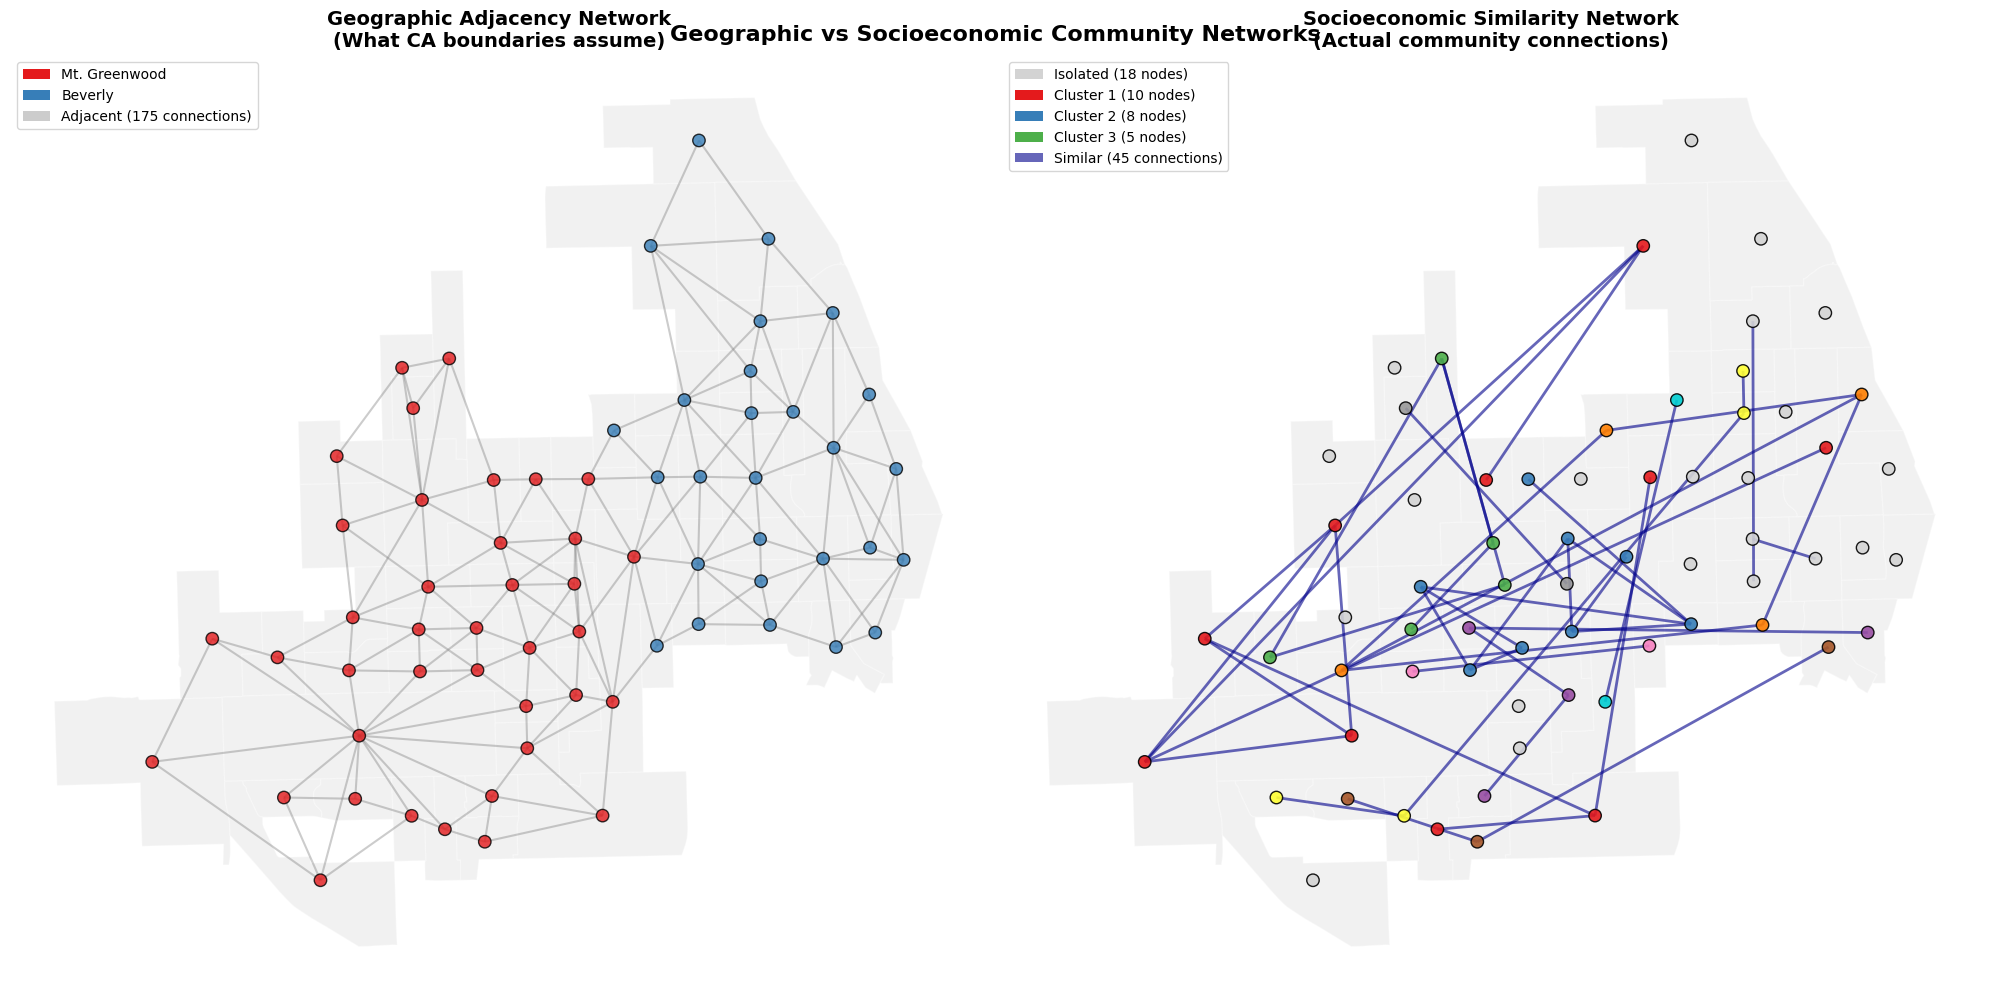

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Patch

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

ax1 = axes[0]

G_spatial = nx.Graph()
G_spatial.add_nodes_from(bg_with_acs['GEOID'])
G_spatial.add_edges_from(edges)

bg_with_acs.plot(ax=ax1, color='lightgray', edgecolor='white', alpha=0.3)

pos = {row["GEOID"]: (row.geometry.centroid.x, row.geometry.centroid.y) 
       for _, row in bg_with_acs.iterrows()}

node_colors_spatial = ['#e41a1c' if ca == 74 else '#377eb8' 
                       for ca in bg_with_acs['area_numbe']]

nx.draw_networkx_nodes(G_spatial, pos, node_size=80, 
                       node_color=node_colors_spatial, 
                       alpha=0.8, ax=ax1, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G_spatial, pos, edge_color='gray', 
                       width=1.5, alpha=0.4, ax=ax1)

ax1.set_title('Geographic Adjacency Network\n(What CA boundaries assume)', 
              fontsize=14, fontweight='bold')
ax1.axis('off')

ax2 = axes[1]

bg_with_acs.plot(ax=ax2, color='lightgray', edgecolor='white', alpha=0.3)

cluster_colors_map = {
    1: '#e41a1c', 2: '#377eb8', 3: '#4daf4a', 4: '#984ea3', 5: '#ff7f00',
    6: '#ffff33', 7: '#a65628', 8: '#f781bf', 9: '#999999', 10: '#00ced1',
    0: '#d3d3d3'  # Isolated
}

node_colors_similarity = [cluster_colors_map.get(bg_with_acs[bg_with_acs['GEOID']==node]['cluster'].values[0], '#d3d3d3') 
                          for node in G_similarity.nodes()]

nx.draw_networkx_nodes(G_similarity, pos, node_size=80, 
                       node_color=node_colors_similarity, 
                       alpha=0.9, ax=ax2, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G_similarity, pos, edge_color='darkblue', 
                       width=2, alpha=0.6, ax=ax2)

ax2.set_title('Socioeconomic Similarity Network\n(Actual community connections)', 
              fontsize=14, fontweight='bold')
ax2.axis('off')

# Add legends
legend_spatial = [
    Patch(facecolor='#e41a1c', label='Mt. Greenwood'),
    Patch(facecolor='#377eb8', label='Beverly'),
    Patch(facecolor='gray', alpha=0.4, label='Adjacent (175 connections)')
]
ax1.legend(handles=legend_spatial, loc='upper left', fontsize=10)

legend_similarity = [
    Patch(facecolor='#d3d3d3', label='Isolated (18 nodes)'),
    Patch(facecolor='#e41a1c', label='Cluster 1 (10 nodes)'),
    Patch(facecolor='#377eb8', label='Cluster 2 (8 nodes)'),
    Patch(facecolor='#4daf4a', label='Cluster 3 (5 nodes)'),
    Patch(facecolor='darkblue', alpha=0.6, label='Similar (45 connections)')
]
ax2.legend(handles=legend_similarity, loc='upper left', fontsize=10)

plt.suptitle('Geographic vs Socioeconomic Community Networks', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('network_comparison_geographic_vs_similarity.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
import geopandas as gpd
import pandas as pd

# Load precinct boundaries
precincts = gpd.read_file('boundaries_ward_precincts.geojson')

print("PRECINCT BOUNDARIES LOADED")
print(f"Total precincts: {len(precincts)}")
print(f"CRS: {precincts.crs}")
print(f"\nColumns: {precincts.columns.tolist()}")
print(f"\nFirst 5 precincts:")
print(precincts.head())

# Check if Ward 19 and 34 are present
if 'ward' in precincts.columns:
    ward_col = 'ward'
elif 'WARD' in precincts.columns:
    ward_col = 'WARD'
else:
    # Try to find ward column
    ward_col = [c for c in precincts.columns if 'ward' in c.lower()][0] if any('ward' in c.lower() for c in precincts.columns) else None

if ward_col:
    print(f"\nUnique wards in data: {sorted(precincts[ward_col].unique())}")
    print(f"\nWards 19 & 34 precincts:")
    local_precincts = precincts[precincts[ward_col].isin([19, 34]) | precincts[ward_col].isin(['19', '34'])]
    print(f"   Ward 19: {len(local_precincts[local_precincts[ward_col].astype(str) == '19'])} precincts")
    print(f"   Ward 34: {len(local_precincts[local_precincts[ward_col].astype(str) == '34'])} precincts")
else:
    print("\nNo ward column found. Column names might be different.")

# Check geometry
print(f"\nGeometry type: {precincts.geometry.type.unique()}")
print(f"Geographic bounds:")
print(f"  {precincts.total_bounds}")

PRECINCT BOUNDARIES LOADED
Total precincts: 1291
CRS: EPSG:4326

Columns: [':id', ':version', ':created_at', ':updated_at', 'shape_leng', 'shape_area', 'ward_precinct', 'ward', 'precinct', 'geometry']

First 5 precincts:
                  :id           :version                      :created_at  \
0  row-h2in-wf8q.cygn  rv-ud5g-y26a.24an 2024-11-22 18:59:46.282000+00:00   
1  row-5vkb-sn3k-usyv  rv-mh9t_8hgi~srjf 2024-11-22 18:59:46.282000+00:00   
2  row-7npm_8x7r.ffk7  rv-bjnu.36pu_rwqg 2024-11-22 18:59:46.282000+00:00   
3  row-zv76.kdsd~rtui  rv-r4vp.vsy8.jaa6 2024-11-22 18:59:46.282000+00:00   
4  row-55it-qd3e_e46q  rv-fnsx-3abs-fg4a 2024-11-22 18:59:46.282000+00:00   

                       :updated_at      shape_leng       shape_area  \
0 2024-11-22 18:59:46.282000+00:00  0.717858701513  0.0310408676071   
1 2024-11-22 18:59:46.282000+00:00  0.837840197993  0.0355913220285   
2 2024-11-22 18:59:46.282000+00:00   1.46043930615  0.0907694507369   
3 2024-11-22 18:59:46.282000+00:

In [22]:
# Load election results
election = gpd.read_file('election_data_mayor_2023.geojson')

print("ELECTION RESULTS LOADED")
print(f"Total records: {len(election)}")
print(f"CRS: {election.crs}")
print(f"\nColumns: {election.columns.tolist()}")
print(f"\nFirst 5 records:")
print(election.head())

# Check for key columns
print(f"\nChecking for vote data...")
vote_cols = [c for c in election.columns if any(x in c.lower() for x in ['johnson', 'vallas', 'vote', 'total'])]
print(f"Vote-related columns: {vote_cols}")

# Check if this has geometry or just data
if 'geometry' in election.columns and election.geometry is not None:
    print(f"\nHas geometry: {election.geometry.type.unique()}")
else:
    print(f"\nNo geometry column - this might just be tabular data")

ELECTION RESULTS LOADED
Total records: 1291
CRS: EPSG:4326

Columns: ['id', 'ward', 'precinct', 'registered', 'ballots', 'total', 'BRANDON JOHNSON', 'PAUL VALLAS', 'BRANDON JOHNSON Percent', 'PAUL VALLAS Percent', 'geometry']

First 5 records:
      id  ward  precinct  registered  ballots  total  BRANDON JOHNSON  \
0  01001     1         1           0        0    779              533   
1  01002     1         2           0        0    789              547   
2  01003     1         3           0        0    858              538   
3  01004     1         4           0        0    725              565   
4  01005     1         5           0        0    764              552   

   PAUL VALLAS  BRANDON JOHNSON Percent  PAUL VALLAS Percent  \
0          246                    68.42                31.58   
1          242                    69.33                30.67   
2          320                    62.70                37.30   
3          160                    77.93                22.07 

In [23]:
import geopandas as gpd

# Load all Chicago precincts
precincts_all = gpd.read_file('boundaries_ward_precincts.geojson')
precincts_all['ward'] = precincts_all['ward'].astype(float).astype(int)

# Ensure CRS matches
if bg_with_acs.crs != precincts_all.crs:
    bg_with_acs = bg_with_acs.to_crs(precincts_all.crs)

print("🔍 FINDING WHICH WARDS COVER YOUR 66 BLOCK GROUPS...")
print()

# Spatial join to find which precincts intersect your block groups
bg_with_wards = gpd.sjoin(
    bg_with_acs[['GEOID', 'community', 'area_numbe', 'geometry']], 
    precincts_all[['ward', 'precinct', 'geometry']], 
    how='left', 
    predicate='intersects'
)

# Get unique wards
unique_wards = sorted(bg_with_wards['ward'].dropna().unique())
print(f"✅ Your 66 block groups intersect with these wards:")
print(f"   Wards: {unique_wards}")

# Count by ward
ward_counts = bg_with_wards.groupby('ward').size().sort_values(ascending=False)
print(f"\n📊 Number of block group-ward intersections:")
for ward, count in ward_counts.items():
    print(f"   Ward {int(ward)}: {count} intersections")

# Check by community area
print(f"\n🏘️ Wards by Community Area:")
for ca in bg_with_wards['community'].unique():
    ca_wards = bg_with_wards[bg_with_wards['community']==ca]['ward'].dropna().unique()
    print(f"   {ca}: Wards {sorted([int(w) for w in ca_wards])}")

print(f"\n✅ We should use Wards: {unique_wards}")

🔍 FINDING WHICH WARDS COVER YOUR 66 BLOCK GROUPS...

✅ Your 66 block groups intersect with these wards:
   Wards: [np.int64(18), np.int64(19), np.int64(21)]

📊 Number of block group-ward intersections:
   Ward 19: 210 intersections
   Ward 18: 10 intersections
   Ward 21: 9 intersections

🏘️ Wards by Community Area:
   MOUNT GREENWOOD: Wards [19]
   BEVERLY: Wards [18, 19, 21]

✅ We should use Wards: [np.int64(18), np.int64(19), np.int64(21)]


📍 FILTERED TO YOUR ACTUAL STUDY AREA

✅ Precinct Boundaries:
   Ward 18: 26 precincts
   Ward 19: 36 precincts
   Ward 21: 29 precincts
   Total: 91 precincts

✅ Election Results:
   Ward 18: 26 records
   Ward 19: 36 records
   Ward 21: 29 records
   Total: 91 records

📊 Ward 18 Voting Summary:
   Total votes: 12,676
   Johnson: 8,186 (64.58%)
   Vallas: 4,490 (35.42%)

📊 Ward 19 Voting Summary:
   Total votes: 24,556
   Johnson: 6,607 (26.91%)
   Vallas: 17,949 (73.09%)

📊 Ward 21 Voting Summary:
   Total votes: 14,007
   Johnson: 11,411 (81.47%)
   Vallas: 2,596 (18.53%)

🔍 Sample election data:
     ward  precinct  total  BRANDON JOHNSON  PAUL VALLAS  \
448    18         1    573              474           99   
449    18         2    594              470          124   
450    18         3    246              194           52   
451    18         4    471              360          111   
452    18         5    417              339           78   
453    18         6    681        

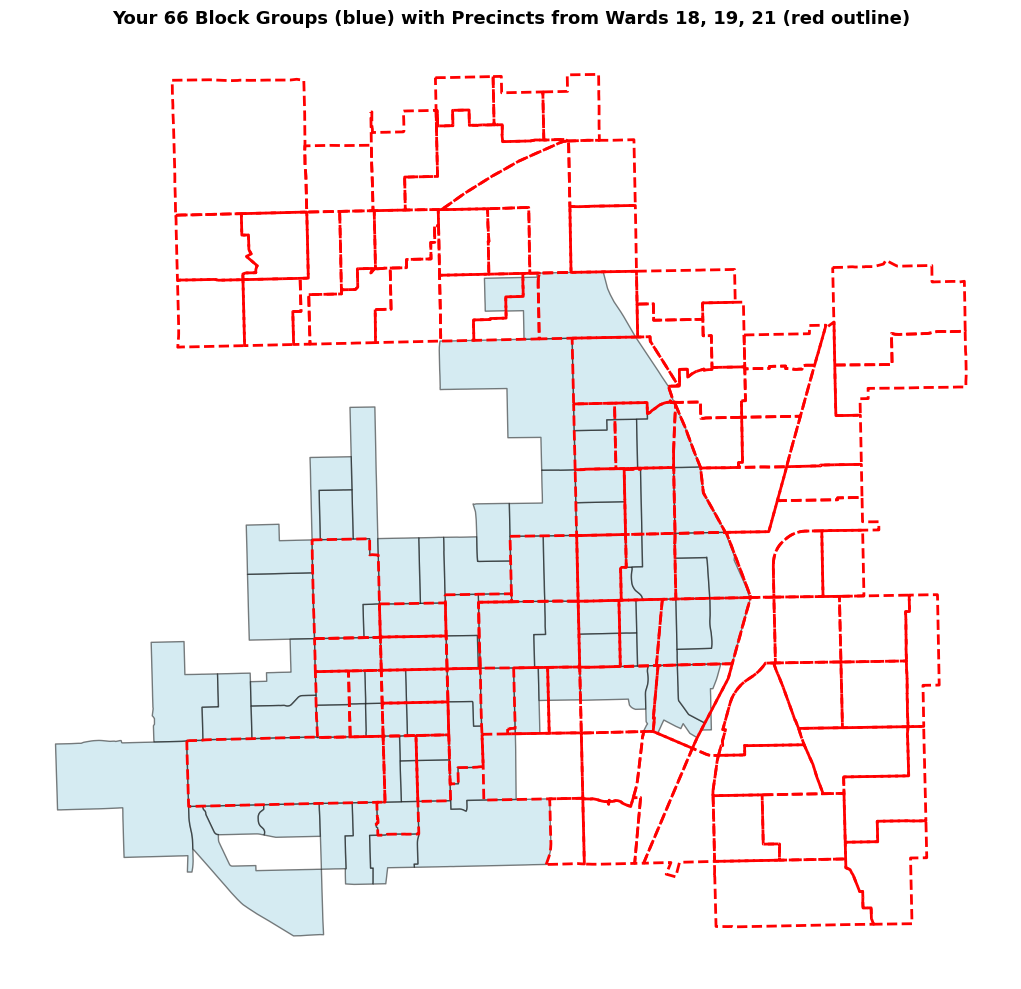


✅ Map shows coverage - precincts should overlap your block groups


In [24]:
# Filter to the correct wards: 18, 19, 21
wards_to_use = [18, 19, 21]

# Clean ward column
precincts['ward'] = precincts['ward'].astype(float).astype(int)
election['ward'] = election['ward'].astype(int)

# Filter
precincts_local = precincts[precincts['ward'].isin(wards_to_use)].copy()
election_local = election[election['ward'].isin(wards_to_use)].copy()

print("📍 FILTERED TO YOUR ACTUAL STUDY AREA")
print(f"\n✅ Precinct Boundaries:")
print(f"   Ward 18: {len(precincts_local[precincts_local['ward']==18])} precincts")
print(f"   Ward 19: {len(precincts_local[precincts_local['ward']==19])} precincts")
print(f"   Ward 21: {len(precincts_local[precincts_local['ward']==21])} precincts")
print(f"   Total: {len(precincts_local)} precincts")

print(f"\n✅ Election Results:")
print(f"   Ward 18: {len(election_local[election_local['ward']==18])} records")
print(f"   Ward 19: {len(election_local[election_local['ward']==19])} records")
print(f"   Ward 21: {len(election_local[election_local['ward']==21])} records")
print(f"   Total: {len(election_local)} records")

# Voting summaries by ward
for ward_num in wards_to_use:
    ward_data = election_local[election_local['ward']==ward_num]
    total_votes = ward_data['total'].sum()
    johnson_votes = ward_data['BRANDON JOHNSON'].sum()
    vallas_votes = ward_data['PAUL VALLAS'].sum()
    
    print(f"\n📊 Ward {ward_num} Voting Summary:")
    print(f"   Total votes: {total_votes:,}")
    print(f"   Johnson: {johnson_votes:,} ({johnson_votes/total_votes*100:.2f}%)")
    print(f"   Vallas: {vallas_votes:,} ({vallas_votes/total_votes*100:.2f}%)")

print(f"\n🔍 Sample election data:")
print(election_local[['ward', 'precinct', 'total', 'BRANDON JOHNSON', 'PAUL VALLAS', 'BRANDON JOHNSON Percent']].head(10))

# Quick plot to verify coverage
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))

# Plot your 66 block groups
bg_with_acs.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, linewidth=1)

# Plot precincts from your 3 wards
precincts_local.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2, linestyle='--')

plt.title('Your 66 Block Groups (blue) with Precincts from Wards 18, 19, 21 (red outline)', 
          fontsize=13, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print("\n✅ Map shows coverage - precincts should overlap your block groups")

In [25]:
import geopandas as gpd
import pandas as pd
import numpy as np

print("🔄 ALTERNATIVE APPROACH: Assign each BG to its dominant precinct...")
print()

# Use the overlay we already created (from previous cell)
# Project both to same CRS
crs_projected = 'EPSG:3435'
bg_proj = bg_with_acs.to_crs(crs_projected)
election_proj = election_local.to_crs(crs_projected)

# Spatial overlay
overlay = gpd.overlay(
    bg_proj[['GEOID', 'community', 'area_numbe', 'cluster', 'geometry']],
    election_proj[['ward', 'precinct', 'total', 'BRANDON JOHNSON', 'PAUL VALLAS', 'geometry']],
    how='intersection'
)

# Calculate overlap areas
overlay['overlap_area'] = overlay.geometry.area

# For each BG, find the precinct with the LARGEST overlap
print("Step 1: Finding dominant precinct for each BG...")

# Group by BG and find max overlap
bg_max_overlap = overlay.loc[overlay.groupby('GEOID')['overlap_area'].idxmax()]

print(f"✅ Assigned {len(bg_max_overlap)} block groups to their dominant precinct")

# Create voting data from dominant precincts
bg_votes_simple = bg_max_overlap[['GEOID', 'ward', 'precinct', 'total', 
                                   'BRANDON JOHNSON', 'PAUL VALLAS', 'overlap_area']].copy()

bg_votes_simple.columns = ['GEOID', 'ward', 'precinct', 'total_votes', 
                           'johnson_votes', 'vallas_votes', 'overlap_area']

# Calculate percentages
bg_votes_simple['johnson_pct'] = (bg_votes_simple['johnson_votes'] / bg_votes_simple['total_votes'] * 100).round(2)
bg_votes_simple['vallas_pct'] = (bg_votes_simple['vallas_votes'] / bg_votes_simple['total_votes'] * 100).round(2)

print(f"\n📊 Results:")
print(f"   Block groups with data: {len(bg_votes_simple)}")
print(f"   Expected: 66")

if len(bg_votes_simple) < 66:
    missing = set(bg_with_acs['GEOID']) - set(bg_votes_simple['GEOID'])
    print(f"   ⚠️ Missing {len(missing)} BGs: {list(missing)}")
    
    # For missing BGs, use nearest neighbor
    print("\nStep 2: Handling missing BGs with nearest neighbor...")
    
    for missing_geoid in missing:
        missing_bg = bg_with_acs[bg_with_acs['GEOID'] == missing_geoid]
        
        # Find nearest precinct
        distances = election_proj.geometry.distance(missing_bg.geometry.iloc[0])
        nearest_idx = distances.idxmin()
        nearest_precinct = election_proj.iloc[nearest_idx]
        
        # Assign this precinct's votes
        new_row = pd.DataFrame({
            'GEOID': [missing_geoid],
            'ward': [nearest_precinct['ward']],
            'precinct': [nearest_precinct['precinct']],
            'total_votes': [nearest_precinct['total']],
            'johnson_votes': [nearest_precinct['BRANDON JOHNSON']],
            'vallas_votes': [nearest_precinct['PAUL VALLAS']],
            'overlap_area': [0.0],
            'johnson_pct': [nearest_precinct['BRANDON JOHNSON']/nearest_precinct['total']*100],
            'vallas_pct': [nearest_precinct['PAUL VALLAS']/nearest_precinct['total']*100]
        })
        
        bg_votes_simple = pd.concat([bg_votes_simple, new_row], ignore_index=True)
    
    print(f"✅ Filled in {len(missing)} missing BGs with nearest neighbor votes")

print(f"\n✅ Final count: {len(bg_votes_simple)} block groups")

# Summary stats
print(f"\n📊 Voting Summary (66 BGs):")
print(f"   Total votes: {bg_votes_simple['total_votes'].sum():,}")
print(f"   Johnson: {bg_votes_simple['johnson_votes'].sum():,} ({bg_votes_simple['johnson_votes'].sum()/bg_votes_simple['total_votes'].sum()*100:.2f}%)")
print(f"   Vallas: {bg_votes_simple['vallas_votes'].sum():,} ({bg_votes_simple['vallas_votes'].sum()/bg_votes_simple['total_votes'].sum()*100:.2f}%)")

print(f"\n🔍 Sample results:")
print(bg_votes_simple[['GEOID', 'ward', 'precinct', 'total_votes', 'johnson_pct', 'vallas_pct']].head(10))

# Save this for later use
bg_votes_final = bg_votes_simple[['GEOID', 'total_votes', 'johnson_votes', 'vallas_votes', 
                                   'johnson_pct', 'vallas_pct']].copy()

print("\n💾 Saved as 'bg_votes_final' for next steps")

🔄 ALTERNATIVE APPROACH: Assign each BG to its dominant precinct...

Step 1: Finding dominant precinct for each BG...
✅ Assigned 66 block groups to their dominant precinct

📊 Results:
   Block groups with data: 66
   Expected: 66

✅ Final count: 66 block groups

📊 Voting Summary (66 BGs):
   Total votes: 46,996
   Johnson: 9,893 (21.05%)
   Vallas: 37,103 (78.95%)

🔍 Sample results:
            GEOID  ward  precinct  total_votes  johnson_pct  vallas_pct
190  170317005021    18         3          246        78.86       21.14
165  170317201001    19         5          653        37.67       62.33
199  170317201002    19        25          548        40.15       59.85
207  170317201003    19        10          603        35.32       64.68
212  170317202001    19        13          478        73.22       26.78
218  170317202002    19        27          727        66.99       33.01
163  170317202003    19        36          545        25.87       74.13
154  170317203001    19        19      

In [26]:
# Merge voting data with your existing bg_with_acs dataset

print("🔗 Merging voting data with socioeconomic data...")

# Merge
bg_complete = bg_with_acs.merge(bg_votes_final, on='GEOID', how='left')

print(f"✅ Merged dataset created: {len(bg_complete)} block groups")
print(f"\nColumns: {bg_complete.columns.tolist()}")

# Verify merge
print(f"\n✔️ Verification:")
print(f"   Rows with voting data: {bg_complete['total_votes'].notna().sum()}")
print(f"   Rows missing voting data: {bg_complete['total_votes'].isna().sum()}")

# Show sample
print(f"\n🔍 Sample of complete dataset:")
print(bg_complete[['GEOID', 'community', 'cluster', 'median_household_income', 
                   'diversity_index', 'total_votes', 'johnson_pct', 'vallas_pct']].head(10))

# Summary by cluster
print(f"\n📊 Voting by HW4 Socioeconomic Cluster:")
cluster_voting = bg_complete.groupby('cluster').agg({
    'johnson_pct': 'mean',
    'vallas_pct': 'mean',
    'median_household_income': 'mean',
    'GEOID': 'count'
}).round(2)
cluster_voting.columns = ['Avg Johnson %', 'Avg Vallas %', 'Avg Income', 'Size']
print(cluster_voting.sort_values('Avg Johnson %', ascending=False))

# Summary by community area
print(f"\n📊 Voting by Community Area:")
ca_voting = bg_complete.groupby('community').agg({
    'johnson_pct': 'mean',
    'vallas_pct': 'mean',
    'GEOID': 'count'
}).round(2)
ca_voting.columns = ['Avg Johnson %', 'Avg Vallas %', 'Count']
print(ca_voting)

# Save for future use
bg_complete.to_file('bg_complete_with_voting.geojson', driver='GeoJSON')
print("\n💾 Saved complete dataset: bg_complete_with_voting.geojson")

print("\n" + "="*70)
print("✅ DATA PREPARATION COMPLETE!")
print("="*70)
print("You now have:")
print("  • 66 block groups")
print("  • 7 socioeconomic variables (HW4)")
print("  • 10 socioeconomic clusters (HW4)")
print("  • Voting data (Johnson/Vallas %)")
print("  • Geographic boundaries")
print("\nReady to proceed with analysis!")
print("="*70)

🔗 Merging voting data with socioeconomic data...
✅ Merged dataset created: 66 block groups

Columns: ['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID', 'GEOIDFQ', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'index_right', 'area_numbe', 'community', 'geometry', 'node_id', 'total_population', 'diversity_index', 'median_age', 'median_household_income', 'unemployment_rate', 'median_home_value', 'mean_travel_time_work', 'cluster', 'is_isolated', 'total_votes', 'johnson_votes', 'vallas_votes', 'johnson_pct', 'vallas_pct']

✔️ Verification:
   Rows with voting data: 66
   Rows missing voting data: 0

🔍 Sample of complete dataset:
          GEOID        community  cluster  median_household_income  \
0  170317403001  MOUNT GREENWOOD        8                 110469.0   
1  170317404002  MOUNT GREENWOOD        0                 139432.0   
2  170318233044  MOUNT GREENWOOD        1                  71811.0   
3  170317404001  MOUNT GREENWOOD        0           

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

print(" Building voting similarity network...")
print()

# Step 1: Select voting variables for similarity
voting_vars = [
    'johnson_pct',
    'vallas_pct'
    # Could add turnout if we had it: 'turnout_pct'
]

print(f" Using {len(voting_vars)} voting variables:")
for var in voting_vars:
    print(f"   - {var}")

# Step 2: Extract features
X_voting = bg_complete[voting_vars].values
geoids_voting = bg_complete['GEOID'].values

print(f"\n Feature matrix: {X_voting.shape} (66 BGs x {len(voting_vars)} variables)")

# Step 3: Standardize to z-scores
scaler = StandardScaler()
X_voting_scaled = scaler.fit_transform(X_voting)

print(f" Standardized features (mean=0, std=1)")
print(f"   Mean: {X_voting_scaled.mean(axis=0).round(10)}")
print(f"   Std: {X_voting_scaled.std(axis=0).round(2)}")

# Step 4: Calculate voting similarity matrix
similarity_matrix_voting = cosine_similarity(X_voting_scaled)

print(f"\n Voting similarity matrix computed: {similarity_matrix_voting.shape}")
print(f"   Min similarity: {similarity_matrix_voting.min():.3f}")
print(f"   Max similarity: {similarity_matrix_voting.max():.3f}")
print(f"   Mean similarity: {similarity_matrix_voting.mean():.3f}")

# Step 5: Build voting network with same threshold as HW4
threshold_voting = 0.80  # Same as your socioeconomic network

edges_voting = []
edge_weights_voting = []

for i in range(len(geoids_voting)):
    for j in range(i + 1, len(geoids_voting)):
        sim = similarity_matrix_voting[i, j]
        if sim >= threshold_voting:
            edges_voting.append((geoids_voting[i], geoids_voting[j]))
            edge_weights_voting.append(sim)

print(f"\n Created {len(edges_voting)} voting similarity edges (threshold ≥ {threshold_voting})")

# Step 6: Build NetworkX graph
import networkx as nx

G_voting = nx.Graph()
G_voting.add_nodes_from(geoids_voting)
G_voting.add_weighted_edges_from([
    (edges_voting[i][0], edges_voting[i][1], edge_weights_voting[i])
    for i in range(len(edges_voting))
])

print(f"\n Voting Similarity Network:")
print(f"   Nodes: {G_voting.number_of_nodes()}")
print(f"   Edges: {G_voting.number_of_edges()}")
print(f"   Density: {nx.density(G_voting):.3f}")
print(f"   Connected components: {nx.number_connected_components(G_voting)}")

if G_voting.number_of_edges() > 0:
    avg_degree = 2 * G_voting.number_of_edges() / G_voting.number_of_nodes()
    print(f"   Average degree: {avg_degree:.2f}")
    
    # Clustering
    if nx.number_connected_components(G_voting) > 0:
        print(f"   Average clustering: {nx.average_clustering(G_voting):.3f}")

# Step 7: Compare to HW4 socioeconomic network
print(f"\n NETWORK COMPARISON:")
print(f"                           Socioeconomic    Voting")
print(f"   Nodes:                  {G_similarity.number_of_nodes():15} {G_voting.number_of_nodes():10}")
print(f"   Edges:                  {G_similarity.number_of_edges():15} {G_voting.number_of_edges():10}")
print(f"   Density:                {nx.density(G_similarity):15.3f} {nx.density(G_voting):10.3f}")
print(f"   Components:             {nx.number_connected_components(G_similarity):15} {nx.number_connected_components(G_voting):10}")
print(f"   Avg Degree:             {2*G_similarity.number_of_edges()/G_similarity.number_of_nodes():15.2f} {2*G_voting.number_of_edges()/G_voting.number_of_nodes() if G_voting.number_of_edges() > 0 else 0:10.2f}")

# Step 8: Edge overlap analysis
print(f"\n EDGE OVERLAP ANALYSIS:")

# Convert edge lists to sets for comparison
edges_socioecon_set = set(G_similarity.edges())
edges_voting_set = set(G_voting.edges())

# Make undirected (both (A,B) and (B,A) are same)
edges_socioecon_normalized = set()
for edge in edges_socioecon_set:
    edges_socioecon_normalized.add(tuple(sorted(edge)))

edges_voting_normalized = set()
for edge in edges_voting_set:
    edges_voting_normalized.add(tuple(sorted(edge)))

# Find overlaps
overlap = edges_socioecon_normalized & edges_voting_normalized
only_socioecon = edges_socioecon_normalized - edges_voting_normalized
only_voting = edges_voting_normalized - edges_socioecon_normalized

print(f"   Edges in both networks: {len(overlap)}")
print(f"   Edges only in socioeconomic: {len(only_socioecon)}")
print(f"   Edges only in voting: {len(only_voting)}")

if len(edges_socioecon_normalized) > 0 and len(edges_voting_normalized) > 0:
    jaccard = len(overlap) / len(edges_socioecon_normalized | edges_voting_normalized)
    print(f"   Jaccard similarity: {jaccard:.3f}")

print("\nSaved G_voting for next analyses")

 Building voting similarity network...

 Using 2 voting variables:
   - johnson_pct
   - vallas_pct

 Feature matrix: (66, 2) (66 BGs x 2 variables)
 Standardized features (mean=0, std=1)
   Mean: [-0. -0.]
   Std: [1. 1.]

 Voting similarity matrix computed: (66, 66)
   Min similarity: -1.000
   Max similarity: 1.000
   Mean similarity: 0.111

 Created 1177 voting similarity edges (threshold ≥ 0.8)

 Voting Similarity Network:
   Nodes: 66
   Edges: 1177
   Density: 0.549
   Connected components: 2
   Average degree: 35.67
   Average clustering: 1.000

 NETWORK COMPARISON:
                           Socioeconomic    Voting
   Nodes:                               66         66
   Edges:                               45       1177
   Density:                          0.021      0.549
   Components:                          30          2
   Avg Degree:                        1.36      35.67

 EDGE OVERLAP ANALYSIS:
   Edges in both networks: 31
   Edges only in socioeconomic: 14
   Edges

🔍 Identifying the two voting communities...

✅ Found 2 voting communities:

VOTING COMMUNITY 1: 44 block groups
   Community Areas: {'MOUNT GREENWOOD': 38, 'BEVERLY': 6}
   Average Johnson %: 9.15%
   Average Vallas %: 90.85%
   Median household income: $107,712
   Average diversity: 0.312
   Spans socioeconomic clusters: {0: 10, 1: 7, 2: 8, 3: 5, 4: 3, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 1}

VOTING COMMUNITY 2: 22 block groups
   Community Areas: {'BEVERLY': 21, 'MOUNT GREENWOOD': 1}
   Average Johnson %: 50.03%
   Average Vallas %: 49.98%
   Median household income: $118,714
   Average diversity: 0.444
   Spans socioeconomic clusters: {0: 12, 1: 3, 4: 1, 5: 2, 6: 2, 7: 1, 10: 1}

💾 Added 'voting_community' column to bg_complete


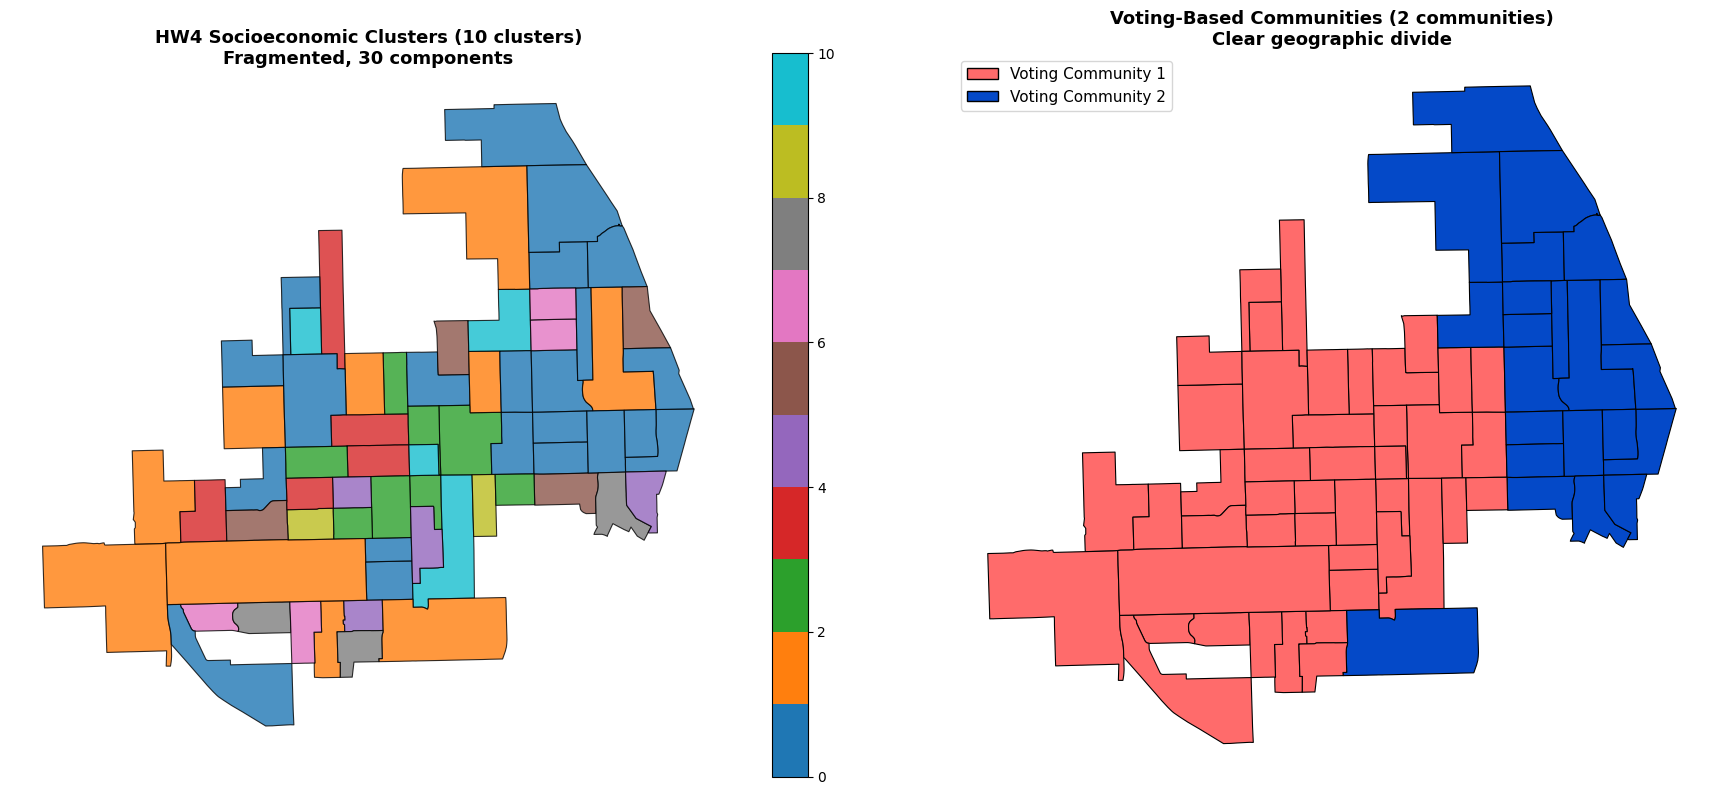

💾 Saved: comparison_socioecon_vs_voting_clusters.png


In [28]:
# Find which BGs are in each voting component

print("🔍 Identifying the two voting communities...")
print()

# Get connected components
components_voting = list(nx.connected_components(G_voting))
components_sorted = sorted(components_voting, key=len, reverse=True)

print(f"✅ Found {len(components_sorted)} voting communities:")
print()

for idx, component in enumerate(components_sorted, 1):
    comp_geoids = list(component)
    comp_data = bg_complete[bg_complete['GEOID'].isin(comp_geoids)]
    
    print(f"VOTING COMMUNITY {idx}: {len(comp_geoids)} block groups")
    print(f"   Community Areas: {comp_data['community'].value_counts().to_dict()}")
    print(f"   Average Johnson %: {comp_data['johnson_pct'].mean():.2f}%")
    print(f"   Average Vallas %: {comp_data['vallas_pct'].mean():.2f}%")
    print(f"   Median household income: ${comp_data['median_household_income'].mean():,.0f}")
    print(f"   Average diversity: {comp_data['diversity_index'].mean():.3f}")
    
    # Show which socioeconomic clusters this voting community spans
    cluster_dist = comp_data['cluster'].value_counts().sort_index()
    print(f"   Spans socioeconomic clusters: {cluster_dist.to_dict()}")
    print()

# Add voting community label to dataset
bg_complete['voting_community'] = 0
for idx, component in enumerate(components_sorted, 1):
    bg_complete.loc[bg_complete['GEOID'].isin(component), 'voting_community'] = idx

print("💾 Added 'voting_community' column to bg_complete")

# Quick visualization with better colors
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Left: Socioeconomic clusters (HW4)
ax1 = axes[0]
bg_complete.plot(column='cluster', ax=ax1, cmap='tab10', 
                 edgecolor='black', linewidth=0.8, legend=True, alpha=0.8)
ax1.set_title('HW4 Socioeconomic Clusters (10 clusters)\nFragmented, 30 components', 
              fontsize=13, fontweight='bold')
ax1.axis('off')

# Right: Voting communities (BETTER COLORS)
ax2 = axes[1]

# Manually assign bright, distinct colors
colors = ['#FF6B6B' if vc == 1 else "#0449C8" for vc in bg_complete['voting_community']]
bg_complete.plot(ax=ax2, color=colors, edgecolor='black', linewidth=0.8)

# Add legend manually
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', edgecolor='black', label='Voting Community 1'),
    Patch(facecolor='#0449C8', edgecolor='black', label='Voting Community 2')
]
ax2.legend(handles=legend_elements, loc='upper left', fontsize=11)

ax2.set_title('Voting-Based Communities (2 communities)\nClear geographic divide', 
              fontsize=13, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.savefig('comparison_socioecon_vs_voting_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Saved: comparison_socioecon_vs_voting_clusters.png")

🎨 Creating actual vs predicted voting comparison...
✅ Calculated predictions and residuals

📊 Prediction accuracy:
   Mean absolute error: 14.98%
   Max overestimate: 50.16%
   Max underestimate: -23.60%


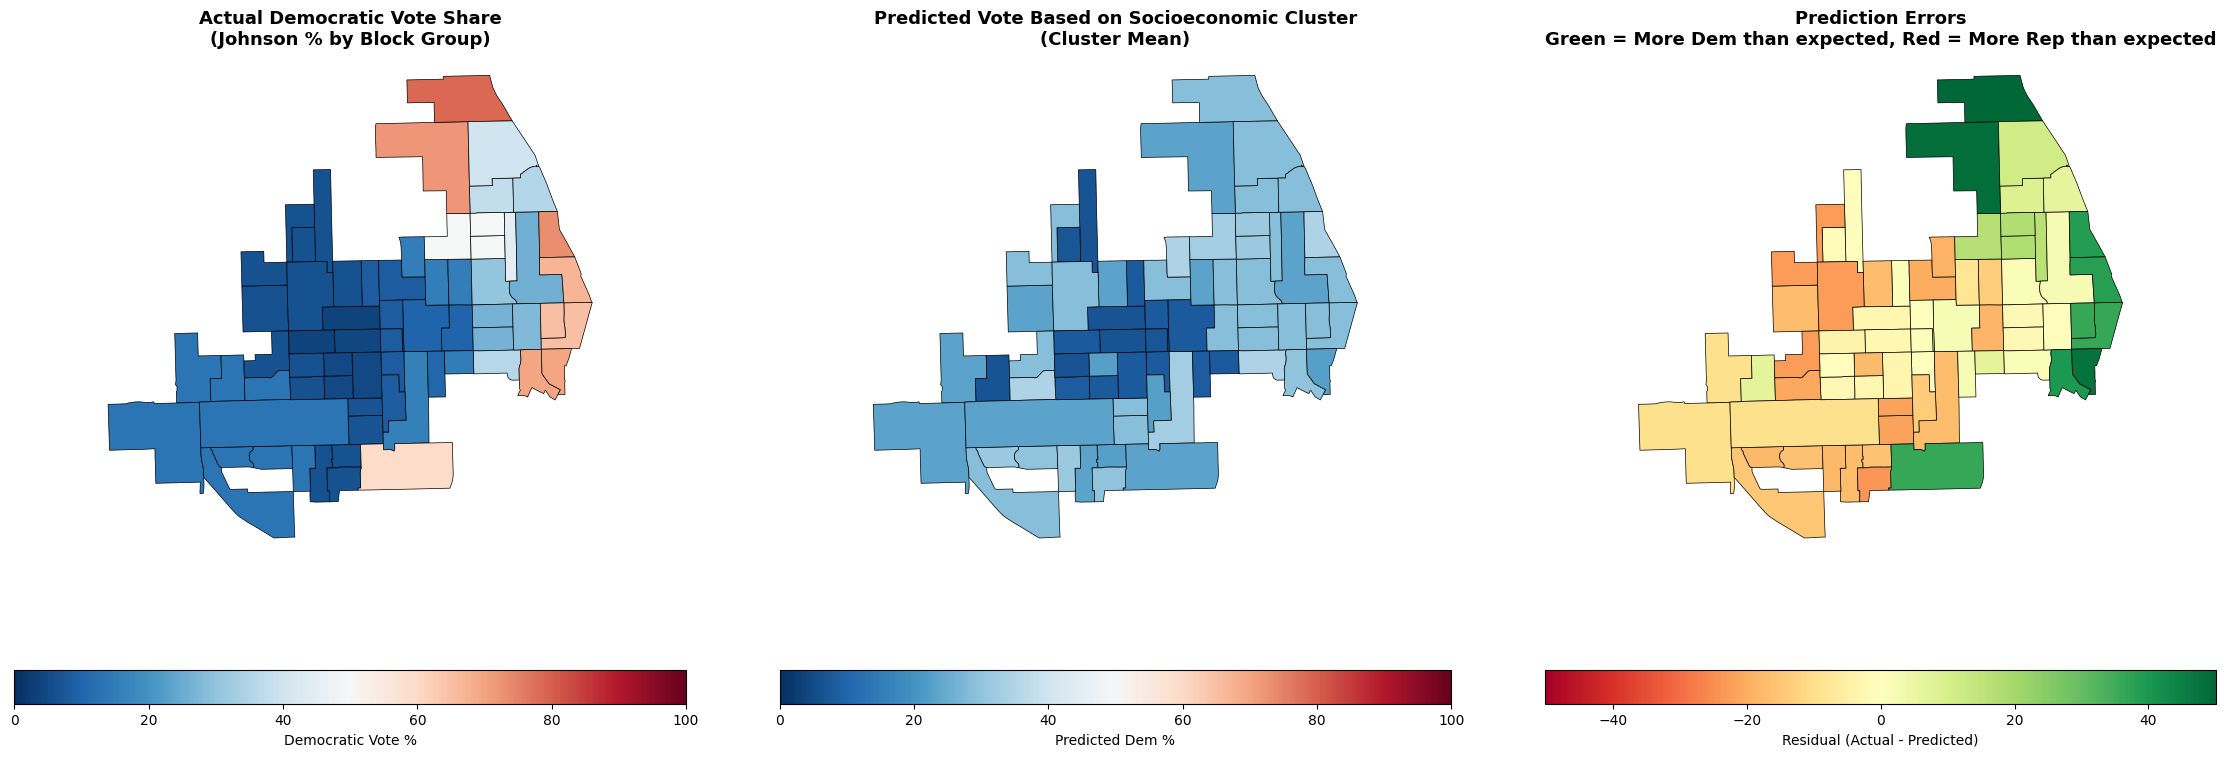


💾 Saved: voting_actual_vs_predicted.png

🔍 Largest Prediction Errors:

Most DEMOCRATIC (vs cluster expectation):
   170317005021: Cluster 0, Actual=78.9%, Predicted=28.7%, Error=+50.2%
   170318216003: Cluster 1, Actual=72.2%, Predicted=23.3%, Error=+48.9%
   170317502001: Cluster 4, Actual=69.9%, Predicted=22.4%, Error=+47.5%
   170317502002: Cluster 7, Actual=69.9%, Predicted=29.9%, Error=+39.9%
   170317202001: Cluster 5, Actual=73.2%, Predicted=34.5%, Error=+38.7%

Most REPUBLICAN (vs cluster expectation):
   170318233043: Cluster 7, Actual=6.3%, Predicted=29.9%, Error=-23.6%
   170318228022: Cluster 0, Actual=6.3%, Predicted=28.7%, Error=-22.4%
   170318227012: Cluster 0, Actual=6.3%, Predicted=28.7%, Error=-22.4%
   170318217005: Cluster 0, Actual=6.3%, Predicted=28.7%, Error=-22.4%
   170317402001: Cluster 0, Actual=6.3%, Predicted=28.7%, Error=-22.4%


In [29]:
import matplotlib.pyplot as plt
import numpy as np

print("🎨 Creating actual vs predicted voting comparison...")

# Calculate predicted voting based on cluster means
cluster_means = bg_complete.groupby('cluster')['johnson_pct'].mean()
bg_complete['johnson_predicted'] = bg_complete['cluster'].map(cluster_means)
bg_complete['johnson_residual'] = bg_complete['johnson_pct'] - bg_complete['johnson_predicted']

print(f"✅ Calculated predictions and residuals")
print(f"\n📊 Prediction accuracy:")
print(f"   Mean absolute error: {abs(bg_complete['johnson_residual']).mean():.2f}%")
print(f"   Max overestimate: {bg_complete['johnson_residual'].max():.2f}%")
print(f"   Max underestimate: {bg_complete['johnson_residual'].min():.2f}%")

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# ===== PANEL 1: Actual Voting =====
ax1 = axes[0]
bg_complete.plot(column='johnson_pct', ax=ax1, cmap='RdBu_r', 
                 edgecolor='black', linewidth=0.5, legend=True,
                 vmin=0, vmax=100,
                 legend_kwds={'label': 'Democratic Vote %', 
                             'orientation': 'horizontal', 'shrink': 0.8})
ax1.set_title('Actual Democratic Vote Share\n(Johnson % by Block Group)', 
              fontsize=13, fontweight='bold')
ax1.axis('off')

# ===== PANEL 2: Predicted Voting (Based on Cluster) =====
ax2 = axes[1]
bg_complete.plot(column='johnson_predicted', ax=ax2, cmap='RdBu_r', 
                 edgecolor='black', linewidth=0.5, legend=True,
                 vmin=0, vmax=100,
                 legend_kwds={'label': 'Predicted Dem %', 
                             'orientation': 'horizontal', 'shrink': 0.8})
ax2.set_title('Predicted Vote Based on Socioeconomic Cluster\n(Cluster Mean)', 
              fontsize=13, fontweight='bold')
ax2.axis('off')

# ===== PANEL 3: Residuals (Where Clusters Got It Wrong) =====
ax3 = axes[2]

# Use diverging colormap centered at 0
vmax_resid = max(abs(bg_complete['johnson_residual'].min()), 
                 abs(bg_complete['johnson_residual'].max()))

bg_complete.plot(column='johnson_residual', ax=ax3, cmap='RdYlGn', 
                 edgecolor='black', linewidth=0.5, legend=True,
                 vmin=-vmax_resid, vmax=vmax_resid,
                 legend_kwds={'label': 'Residual (Actual - Predicted)', 
                             'orientation': 'horizontal', 'shrink': 0.8})

ax3.set_title('Prediction Errors\nGreen = More Dem than expected, Red = More Rep than expected', 
              fontsize=13, fontweight='bold')
ax3.axis('off')

plt.tight_layout()
plt.savefig('voting_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Saved: voting_actual_vs_predicted.png")

# Identify BGs with largest errors
print(f"\n🔍 Largest Prediction Errors:")
print(f"\nMost DEMOCRATIC (vs cluster expectation):")
most_dem = bg_complete.nlargest(5, 'johnson_residual')[['GEOID', 'cluster', 'johnson_pct', 'johnson_predicted', 'johnson_residual']]
for idx, row in most_dem.iterrows():
    print(f"   {row['GEOID']}: Cluster {row['cluster']}, Actual={row['johnson_pct']:.1f}%, Predicted={row['johnson_predicted']:.1f}%, Error=+{row['johnson_residual']:.1f}%")

print(f"\nMost REPUBLICAN (vs cluster expectation):")
most_rep = bg_complete.nsmallest(5, 'johnson_residual')[['GEOID', 'cluster', 'johnson_pct', 'johnson_predicted', 'johnson_residual']]
for idx, row in most_rep.iterrows():
    print(f"   {row['GEOID']}: Cluster {row['cluster']}, Actual={row['johnson_pct']:.1f}%, Predicted={row['johnson_predicted']:.1f}%, Error={row['johnson_residual']:.1f}%")

🎨 Creating network degree comparison...
✅ Calculated network degrees

📊 Degree Statistics:
   Socioeconomic network:
      Mean degree: 1.36
      Max degree: 4
      Isolated nodes: 18

   Voting network:
      Mean degree: 35.67
      Max degree: 43
      Isolated nodes: 0


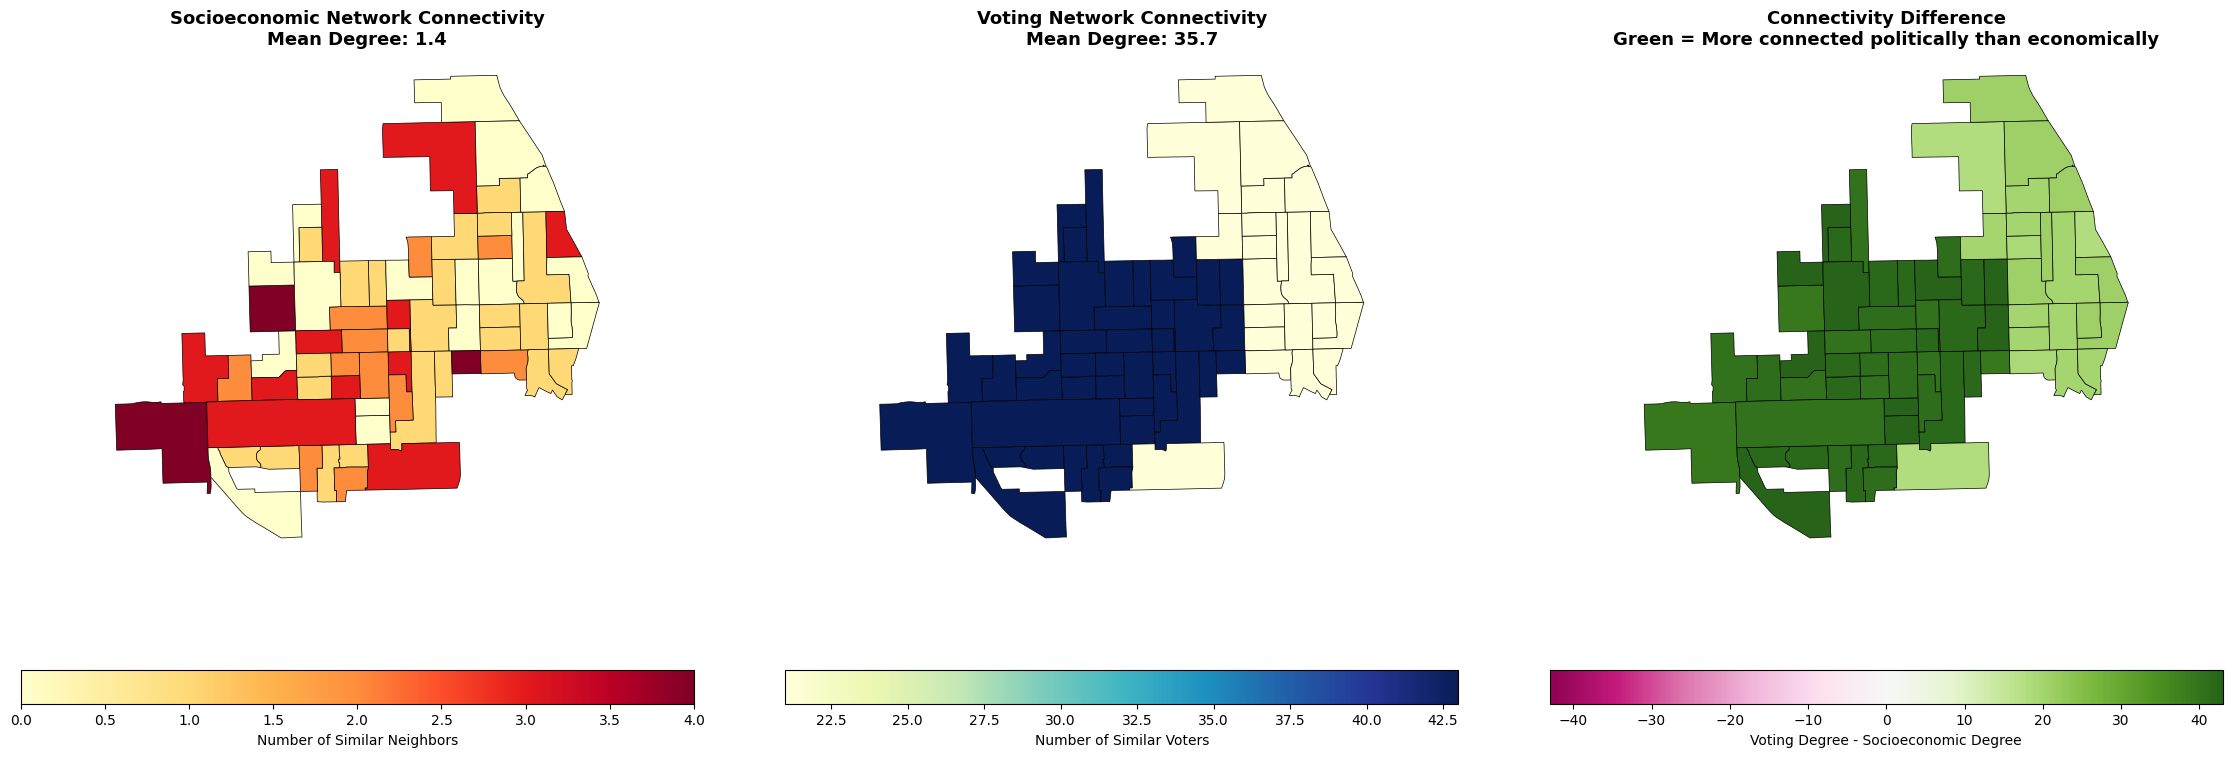


💾 Saved: network_degree_comparison.png

📈 Correlation between socioeconomic and voting degree: 0.219
   Low correlation - networks are structurally different!

🌟 Network Hubs:

Socioeconomic hubs (most connected):
   170318227021: 4 socioeconomic neighbors, 43 voting neighbors
   170318232001: 4 socioeconomic neighbors, 43 voting neighbors
   170317503001: 4 socioeconomic neighbors, 43 voting neighbors
   170317401003: 3 socioeconomic neighbors, 43 voting neighbors
   170318217003: 3 socioeconomic neighbors, 43 voting neighbors

Voting hubs (most politically connected):
   170317403001: 1 socioeconomic neighbors, 43 voting neighbors
   170317404002: 0 socioeconomic neighbors, 43 voting neighbors
   170318233044: 1 socioeconomic neighbors, 43 voting neighbors
   170317404001: 0 socioeconomic neighbors, 43 voting neighbors
   170317401003: 3 socioeconomic neighbors, 43 voting neighbors


In [30]:
import matplotlib.pyplot as plt
import networkx as nx

print("🎨 Creating network degree comparison...")

# Calculate node degrees for both networks
socioecon_degrees = dict(G_similarity.degree())
voting_degrees = dict(G_voting.degree())

# Add to dataframe
bg_complete['socioecon_degree'] = bg_complete['GEOID'].map(socioecon_degrees)
bg_complete['voting_degree'] = bg_complete['GEOID'].map(voting_degrees)
bg_complete['degree_difference'] = bg_complete['voting_degree'] - bg_complete['socioecon_degree']

print(f"✅ Calculated network degrees")
print(f"\n📊 Degree Statistics:")
print(f"   Socioeconomic network:")
print(f"      Mean degree: {bg_complete['socioecon_degree'].mean():.2f}")
print(f"      Max degree: {bg_complete['socioecon_degree'].max()}")
print(f"      Isolated nodes: {(bg_complete['socioecon_degree']==0).sum()}")

print(f"\n   Voting network:")
print(f"      Mean degree: {bg_complete['voting_degree'].mean():.2f}")
print(f"      Max degree: {bg_complete['voting_degree'].max()}")
print(f"      Isolated nodes: {(bg_complete['voting_degree']==0).sum()}")

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# ===== PANEL 1: Socioeconomic Network Degree =====
ax1 = axes[0]
bg_complete.plot(column='socioecon_degree', ax=ax1, cmap='YlOrRd', 
                 edgecolor='black', linewidth=0.5, legend=True,
                 legend_kwds={'label': 'Number of Similar Neighbors', 
                             'orientation': 'horizontal', 'shrink': 0.8})
ax1.set_title(f'Socioeconomic Network Connectivity\nMean Degree: {bg_complete["socioecon_degree"].mean():.1f}', 
              fontsize=13, fontweight='bold')
ax1.axis('off')

# ===== PANEL 2: Voting Network Degree =====
ax2 = axes[1]
bg_complete.plot(column='voting_degree', ax=ax2, cmap='YlGnBu', 
                 edgecolor='black', linewidth=0.5, legend=True,
                 legend_kwds={'label': 'Number of Similar Voters', 
                             'orientation': 'horizontal', 'shrink': 0.8})
ax2.set_title(f'Voting Network Connectivity\nMean Degree: {bg_complete["voting_degree"].mean():.1f}', 
              fontsize=13, fontweight='bold')
ax2.axis('off')

# ===== PANEL 3: Degree Difference =====
ax3 = axes[2]

# Diverging colormap
vmax_diff = max(abs(bg_complete['degree_difference'].min()), 
                abs(bg_complete['degree_difference'].max()))

bg_complete.plot(column='degree_difference', ax=ax3, cmap='PiYG', 
                 edgecolor='black', linewidth=0.5, legend=True,
                 vmin=-vmax_diff, vmax=vmax_diff,
                 legend_kwds={'label': 'Voting Degree - Socioeconomic Degree', 
                             'orientation': 'horizontal', 'shrink': 0.8})

ax3.set_title('Connectivity Difference\nGreen = More connected politically than economically', 
              fontsize=13, fontweight='bold')
ax3.axis('off')

plt.tight_layout()
plt.savefig('network_degree_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Saved: network_degree_comparison.png")

# Correlation analysis
correlation = bg_complete[['socioecon_degree', 'voting_degree']].corr().iloc[0, 1]
print(f"\n📈 Correlation between socioeconomic and voting degree: {correlation:.3f}")
print(f"   {'Low correlation - networks are structurally different!' if abs(correlation) < 0.5 else 'High correlation - networks are similar'}")

# Identify hub nodes
print(f"\n🌟 Network Hubs:")
print(f"\nSocioeconomic hubs (most connected):")
socioecon_hubs = bg_complete.nlargest(5, 'socioecon_degree')[['GEOID', 'cluster', 'socioecon_degree', 'voting_degree']]
for idx, row in socioecon_hubs.iterrows():
    print(f"   {row['GEOID']}: {int(row['socioecon_degree'])} socioeconomic neighbors, {int(row['voting_degree'])} voting neighbors")

print(f"\nVoting hubs (most politically connected):")
voting_hubs = bg_complete.nlargest(5, 'voting_degree')[['GEOID', 'cluster', 'socioecon_degree', 'voting_degree']]
for idx, row in voting_hubs.iterrows():
    print(f"   {row['GEOID']}: {int(row['socioecon_degree'])} socioeconomic neighbors, {int(row['voting_degree'])} voting neighbors")

In [31]:
import scipy.stats as stats
import pandas as pd
import numpy as np

print("=" * 70)
print("STATISTICAL TEST 1: ANOVA - Do Socioeconomic Clusters Predict Voting?")
print("=" * 70)
print()

# Prepare data - remove isolated cluster (cluster 0 = isolated nodes from HW4)
# Or include all - your choice
data_for_anova = bg_complete.copy()

# Group voting percentages by cluster
groups = []
cluster_ids = sorted(data_for_anova['cluster'].unique())

for cluster_id in cluster_ids:
    cluster_votes = data_for_anova[data_for_anova['cluster'] == cluster_id]['johnson_pct'].values
    groups.append(cluster_votes)
    print(f"Cluster {cluster_id}: n={len(cluster_votes)}, mean={cluster_votes.mean():.2f}%, std={cluster_votes.std():.2f}%")

# Perform one-way ANOVA
print("\n" + "=" * 70)
print("ANOVA Results:")
print("=" * 70)

f_statistic, p_value = stats.f_oneway(*groups)

print(f"\nNull Hypothesis: All clusters have equal mean Democratic vote share")
print(f"Alternative Hypothesis: At least one cluster has different mean")
print(f"\nF-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.001:
    print(f"\n✅ Result: REJECT null hypothesis (p < 0.001)")
    print(f"   Clusters DO significantly predict voting")
elif p_value < 0.05:
    print(f"\n✅ Result: REJECT null hypothesis (p < 0.05)")
    print(f"   Clusters significantly predict voting")
else:
    print(f"\n❌ Result: FAIL TO REJECT null hypothesis (p ≥ 0.05)")
    print(f"   Clusters do NOT significantly predict voting")

# Calculate effect size (eta-squared)
# Total sum of squares
grand_mean = data_for_anova['johnson_pct'].mean()
ss_total = np.sum((data_for_anova['johnson_pct'] - grand_mean) ** 2)

# Between-group sum of squares
ss_between = 0
for cluster_id in cluster_ids:
    cluster_data = data_for_anova[data_for_anova['cluster'] == cluster_id]
    n = len(cluster_data)
    cluster_mean = cluster_data['johnson_pct'].mean()
    ss_between += n * (cluster_mean - grand_mean) ** 2

eta_squared = ss_between / ss_total

print(f"\nEffect Size (η²): {eta_squared:.4f}")
if eta_squared < 0.01:
    print(f"   Small effect - clusters explain <1% of variance")
elif eta_squared < 0.06:
    print(f"   Small effect - clusters explain {eta_squared*100:.1f}% of variance")
elif eta_squared < 0.14:
    print(f"   Medium effect - clusters explain {eta_squared*100:.1f}% of variance")
else:
    print(f"   Large effect - clusters explain {eta_squared*100:.1f}% of variance")

# Within-cluster variance vs between-cluster variance
within_cluster_variance = []
for cluster_id in cluster_ids:
    cluster_votes = data_for_anova[data_for_anova['cluster'] == cluster_id]['johnson_pct']
    if len(cluster_votes) > 1:
        within_cluster_variance.append(cluster_votes.var())

avg_within_variance = np.mean(within_cluster_variance)

# Between-cluster variance (variance of cluster means)
cluster_means = [data_for_anova[data_for_anova['cluster'] == c]['johnson_pct'].mean() 
                 for c in cluster_ids]
between_cluster_variance = np.var(cluster_means)

print(f"\n📊 Variance Decomposition:")
print(f"   Within-cluster variance (avg): {avg_within_variance:.2f}")
print(f"   Between-cluster variance: {between_cluster_variance:.2f}")
print(f"   Ratio (between/within): {between_cluster_variance/avg_within_variance:.2f}")

if between_cluster_variance > avg_within_variance:
    print(f"   ✅ Between-cluster > Within-cluster: Clusters create distinct groups")
else:
    print(f"   ⚠️ Within-cluster > Between-cluster: High internal variation")

print("\n" + "=" * 70)

STATISTICAL TEST 1: ANOVA - Do Socioeconomic Clusters Predict Voting?

Cluster 0: n=22, mean=28.70%, std=22.64%
Cluster 1: n=10, mean=23.29%, std=22.19%
Cluster 2: n=8, mean=7.98%, std=3.34%
Cluster 3: n=5, mean=6.88%, std=3.51%
Cluster 4: n=4, mean=22.37%, std=27.46%
Cluster 5: n=4, mean=34.53%, std=24.00%
Cluster 6: n=4, mean=31.62%, std=18.00%
Cluster 7: n=3, mean=29.95%, std=28.39%
Cluster 8: n=2, mean=8.27%, std=2.01%
Cluster 9: n=2, mean=7.39%, std=1.05%
Cluster 10: n=2, mean=32.63%, std=16.98%

ANOVA Results:

Null Hypothesis: All clusters have equal mean Democratic vote share
Alternative Hypothesis: At least one cluster has different mean

F-statistic: 1.2493
p-value: 0.281780

❌ Result: FAIL TO REJECT null hypothesis (p ≥ 0.05)
   Clusters do NOT significantly predict voting

Effect Size (η²): 0.1851
   Large effect - clusters explain 18.5% of variance

📊 Variance Decomposition:
   Within-cluster variance (avg): 464.83
   Between-cluster variance: 117.56
   Ratio (between/with

In [32]:
print("=" * 70)
print("STATISTICAL TEST 2: Clusters vs Community Areas")
print("=" * 70)
print()

# Test 1: Variance within clusters vs within CAs
print("📊 Within-Group Variance Comparison:")
print()

# Variance within each cluster
cluster_variances = []
for cluster_id in data_for_anova['cluster'].unique():
    cluster_data = data_for_anova[data_for_anova['cluster'] == cluster_id]['johnson_pct']
    if len(cluster_data) > 1:
        var = cluster_data.var()
        cluster_variances.append(var)
        print(f"   Cluster {cluster_id}: variance = {var:.2f} (n={len(cluster_data)})")

avg_cluster_variance = np.mean(cluster_variances)
print(f"\n   Average within-cluster variance: {avg_cluster_variance:.2f}")

# Variance within each CA
print(f"\n📊 Within-CA Variance:")
ca_variances = []
for ca in data_for_anova['community'].unique():
    ca_data = data_for_anova[data_for_anova['community'] == ca]['johnson_pct']
    var = ca_data.var()
    ca_variances.append(var)
    print(f"   {ca}: variance = {var:.2f} (n={len(ca_data)})")

avg_ca_variance = np.mean(ca_variances)
print(f"\n   Average within-CA variance: {avg_ca_variance:.2f}")

# Comparison
print(f"\n✅ COMPARISON:")
print(f"   Cluster variance: {avg_cluster_variance:.2f}")
print(f"   CA variance: {avg_ca_variance:.2f}")
improvement = (avg_ca_variance - avg_cluster_variance) / avg_ca_variance * 100
print(f"   Improvement: {improvement:.1f}%")

if avg_cluster_variance < avg_ca_variance:
    print(f"   ✅ Clusters have lower internal variance = BETTER predictors than CAs")
else:
    print(f"   ❌ CAs have lower internal variance = Clusters are NOT better")

# Test 2: R-squared comparison
from sklearn.metrics import r2_score

# Predict based on cluster means
bg_complete['johnson_pred_cluster'] = bg_complete['cluster'].map(
    bg_complete.groupby('cluster')['johnson_pct'].mean()
)

# Predict based on CA means
bg_complete['johnson_pred_ca'] = bg_complete['community'].map(
    bg_complete.groupby('community')['johnson_pct'].mean()
)

# Calculate R-squared
r2_cluster = r2_score(bg_complete['johnson_pct'], bg_complete['johnson_pred_cluster'])
r2_ca = r2_score(bg_complete['johnson_pct'], bg_complete['johnson_pred_ca'])

print(f"\n📊 Predictive Power (R²):")
print(f"   Cluster model R²: {r2_cluster:.4f} (explains {r2_cluster*100:.2f}% of variance)")
print(f"   CA model R²: {r2_ca:.4f} (explains {r2_ca*100:.2f}% of variance)")

if r2_cluster > r2_ca:
    print(f"   ✅ Clusters explain {(r2_cluster-r2_ca)*100:.2f}% MORE variance than CAs")
else:
    print(f"   ❌ CAs explain {(r2_ca-r2_cluster)*100:.2f}% MORE variance than clusters")

# ANOVA for CAs
print(f"\n📊 ANOVA for Community Areas:")
ca_groups = []
for ca in data_for_anova['community'].unique():
    ca_votes = data_for_anova[data_for_anova['community'] == ca]['johnson_pct'].values
    ca_groups.append(ca_votes)

f_stat_ca, p_value_ca = stats.f_oneway(*ca_groups)
print(f"   F-statistic: {f_stat_ca:.4f}")
print(f"   p-value: {p_value_ca:.6f}")

if p_value_ca < 0.05:
    print(f"   ✅ CAs significantly differ in voting (p < 0.05)")
else:
    print(f"   ❌ CAs do NOT significantly differ in voting")

print("\n" + "=" * 70)
print("SUMMARY:")
print("=" * 70)

print(f"\nClusters:")
print(f"  • F-statistic: {f_statistic:.2f}, p-value: {p_value:.4f}")
print(f"  • R²: {r2_cluster:.4f}")
print(f"  • Avg within-variance: {avg_cluster_variance:.2f}")

print(f"\nCommunity Areas:")
print(f"  • F-statistic: {f_stat_ca:.2f}, p-value: {p_value_ca:.4f}")
print(f"  • R²: {r2_ca:.4f}")
print(f"  • Avg within-variance: {avg_ca_variance:.2f}")

if r2_cluster > r2_ca and avg_cluster_variance < avg_ca_variance:
    print(f"\n✅ CONCLUSION: Clusters are BETTER predictors than CAs")
elif r2_cluster < r2_ca and avg_cluster_variance > avg_ca_variance:
    print(f"\n❌ CONCLUSION: CAs are BETTER predictors than clusters")
else:
    print(f"\n⚠️ CONCLUSION: Mixed results - some metrics favor clusters, others favor CAs")

print("=" * 70)

STATISTICAL TEST 2: Clusters vs Community Areas

📊 Within-Group Variance Comparison:

   Cluster 8: variance = 8.12 (n=2)
   Cluster 0: variance = 537.04 (n=22)
   Cluster 1: variance = 547.12 (n=10)
   Cluster 2: variance = 12.74 (n=8)
   Cluster 3: variance = 15.41 (n=5)
   Cluster 4: variance = 1005.18 (n=4)
   Cluster 5: variance = 767.74 (n=4)
   Cluster 9: variance = 2.23 (n=2)
   Cluster 6: variance = 432.00 (n=4)
   Cluster 7: variance = 1208.62 (n=3)
   Cluster 10: variance = 576.98 (n=2)

   Average within-cluster variance: 464.83

📊 Within-CA Variance:
   MOUNT GREENWOOD: variance = 79.11 (n=39)
   BEVERLY: variance = 489.89 (n=27)

   Average within-CA variance: 284.50

✅ COMPARISON:
   Cluster variance: 464.83
   CA variance: 284.50
   Improvement: -63.4%
   ❌ CAs have lower internal variance = Clusters are NOT better

📊 Predictive Power (R²):
   Cluster model R²: 0.1851 (explains 18.51% of variance)
   CA model R²: 0.5060 (explains 50.60% of variance)
   ❌ CAs explain 32.

In [33]:
import scipy.stats as stats
import numpy as np

print("=" * 70)
print("STATISTICAL TEST 3: Herd Behavior - Spatial vs Demographic Influence")
print("=" * 70)
print()

# Compare voting similarity along two types of edges:
# 1. Spatial edges (geographic neighbors from HW4)
# 2. Demographic edges (same cluster, not spatially adjacent)

print("🔍 Comparing voting similarity across different edge types...")
print()

# Get spatial edges (from HW4 - touching boundaries)
# Your 'edges' variable should still have the spatial adjacency list
spatial_edges = edges if 'edges' in globals() else list(nx.Graph(edges_df.values).edges())

# Calculate voting similarity along spatial edges
spatial_voting_sim = []
for edge in spatial_edges:
    geoid1, geoid2 = edge
    if geoid1 in bg_complete['GEOID'].values and geoid2 in bg_complete['GEOID'].values:
        vote1 = bg_complete[bg_complete['GEOID']==geoid1]['johnson_pct'].values[0]
        vote2 = bg_complete[bg_complete['GEOID']==geoid2]['johnson_pct'].values[0]
        # Similarity = 100 - absolute difference
        similarity = 100 - abs(vote1 - vote2)
        spatial_voting_sim.append(similarity)

print(f"📊 Spatial Edges (Geographic Neighbors):")
print(f"   Number of edges: {len(spatial_voting_sim)}")
print(f"   Mean voting similarity: {np.mean(spatial_voting_sim):.2f}%")
print(f"   Std dev: {np.std(spatial_voting_sim):.2f}%")

# Calculate voting similarity within same cluster (but not spatially adjacent)
cluster_voting_sim = []
for cluster_id in bg_complete['cluster'].unique():
    cluster_bgs = bg_complete[bg_complete['cluster']==cluster_id]['GEOID'].values
    
    # For each pair in the cluster
    for i, geoid1 in enumerate(cluster_bgs):
        for geoid2 in cluster_bgs[i+1:]:
            # Check if they're NOT spatially adjacent
            if (geoid1, geoid2) not in spatial_edges and (geoid2, geoid1) not in spatial_edges:
                vote1 = bg_complete[bg_complete['GEOID']==geoid1]['johnson_pct'].values[0]
                vote2 = bg_complete[bg_complete['GEOID']==geoid2]['johnson_pct'].values[0]
                similarity = 100 - abs(vote1 - vote2)
                cluster_voting_sim.append(similarity)

print(f"\n📊 Demographic Edges (Same Cluster, Not Adjacent):")
print(f"   Number of pairs: {len(cluster_voting_sim)}")
print(f"   Mean voting similarity: {np.mean(cluster_voting_sim):.2f}%")
print(f"   Std dev: {np.std(cluster_voting_sim):.2f}%")

# Statistical test: Are spatial neighbors more similar than demographic peers?
print(f"\n" + "=" * 70)
print("T-TEST: Spatial Similarity vs Demographic Similarity")
print("=" * 70)

t_stat, p_value = stats.ttest_ind(spatial_voting_sim, cluster_voting_sim)

print(f"\nNull Hypothesis: Spatial and demographic similarities are equal")
print(f"Alternative: Spatial similarity ≠ Demographic similarity")
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"\n✅ Result: REJECT null hypothesis (p < 0.05)")
    if np.mean(spatial_voting_sim) > np.mean(cluster_voting_sim):
        print(f"   Geographic neighbors vote MORE similarly than demographic peers")
        print(f"   Difference: {np.mean(spatial_voting_sim) - np.mean(cluster_voting_sim):.2f}%")
        print(f"   ✅ EVIDENCE OF HERD BEHAVIOR / SPATIAL INFLUENCE")
    else:
        print(f"   Demographic peers vote MORE similarly than geographic neighbors")
        print(f"   Difference: {np.mean(cluster_voting_sim) - np.mean(spatial_voting_sim):.2f}%")
else:
    print(f"\n❌ Result: FAIL TO REJECT null hypothesis")
    print(f"   No significant difference between spatial and demographic similarity")

# Effect size (Cohen's d)
pooled_std = np.sqrt((np.std(spatial_voting_sim)**2 + np.std(cluster_voting_sim)**2) / 2)
cohens_d = (np.mean(spatial_voting_sim) - np.mean(cluster_voting_sim)) / pooled_std

print(f"\nEffect Size (Cohen's d): {cohens_d:.4f}")
if abs(cohens_d) < 0.2:
    print(f"   Small effect")
elif abs(cohens_d) < 0.5:
    print(f"   Medium effect")
else:
    print(f"   Large effect")

print("\n" + "=" * 70)
print("INTERPRETATION:")
print("=" * 70)

if np.mean(spatial_voting_sim) > np.mean(cluster_voting_sim) and p_value < 0.05:
    print("\n✅ Strong evidence that voting is influenced by geographic proximity")
    print("   beyond shared demographics. This suggests:")
    print("   • Social influence / herd behavior exists")
    print("   • People vote like their neighbors more than like their economic peers")
    print("   • Community identity is spatial, not just socioeconomic")
elif np.mean(cluster_voting_sim) > np.mean(spatial_voting_sim) and p_value < 0.05:
    print("\n⚠️ Demographics matter more than geography")
    print("   • People vote according to economic interests")
    print("   • Limited evidence of spatial herd behavior")
else:
    print("\n⚠️ No clear difference between spatial and demographic influence")

print("=" * 70)

STATISTICAL TEST 3: Herd Behavior - Spatial vs Demographic Influence

🔍 Comparing voting similarity across different edge types...

📊 Spatial Edges (Geographic Neighbors):
   Number of edges: 175
   Mean voting similarity: 91.60%
   Std dev: 12.99%

📊 Demographic Edges (Same Cluster, Not Adjacent):
   Number of pairs: 298
   Mean voting similarity: 74.35%
   Std dev: 20.97%

T-TEST: Spatial Similarity vs Demographic Similarity

Null Hypothesis: Spatial and demographic similarities are equal
Alternative: Spatial similarity ≠ Demographic similarity

t-statistic: 9.8144
p-value: 0.000000

✅ Result: REJECT null hypothesis (p < 0.05)
   Geographic neighbors vote MORE similarly than demographic peers
   Difference: 17.26%
   ✅ EVIDENCE OF HERD BEHAVIOR / SPATIAL INFLUENCE

Effect Size (Cohen's d): 0.9895
   Large effect

INTERPRETATION:

✅ Strong evidence that voting is influenced by geographic proximity
   beyond shared demographics. This suggests:
   • Social influence / herd behavior exis

🎨 Creating main summary figure...


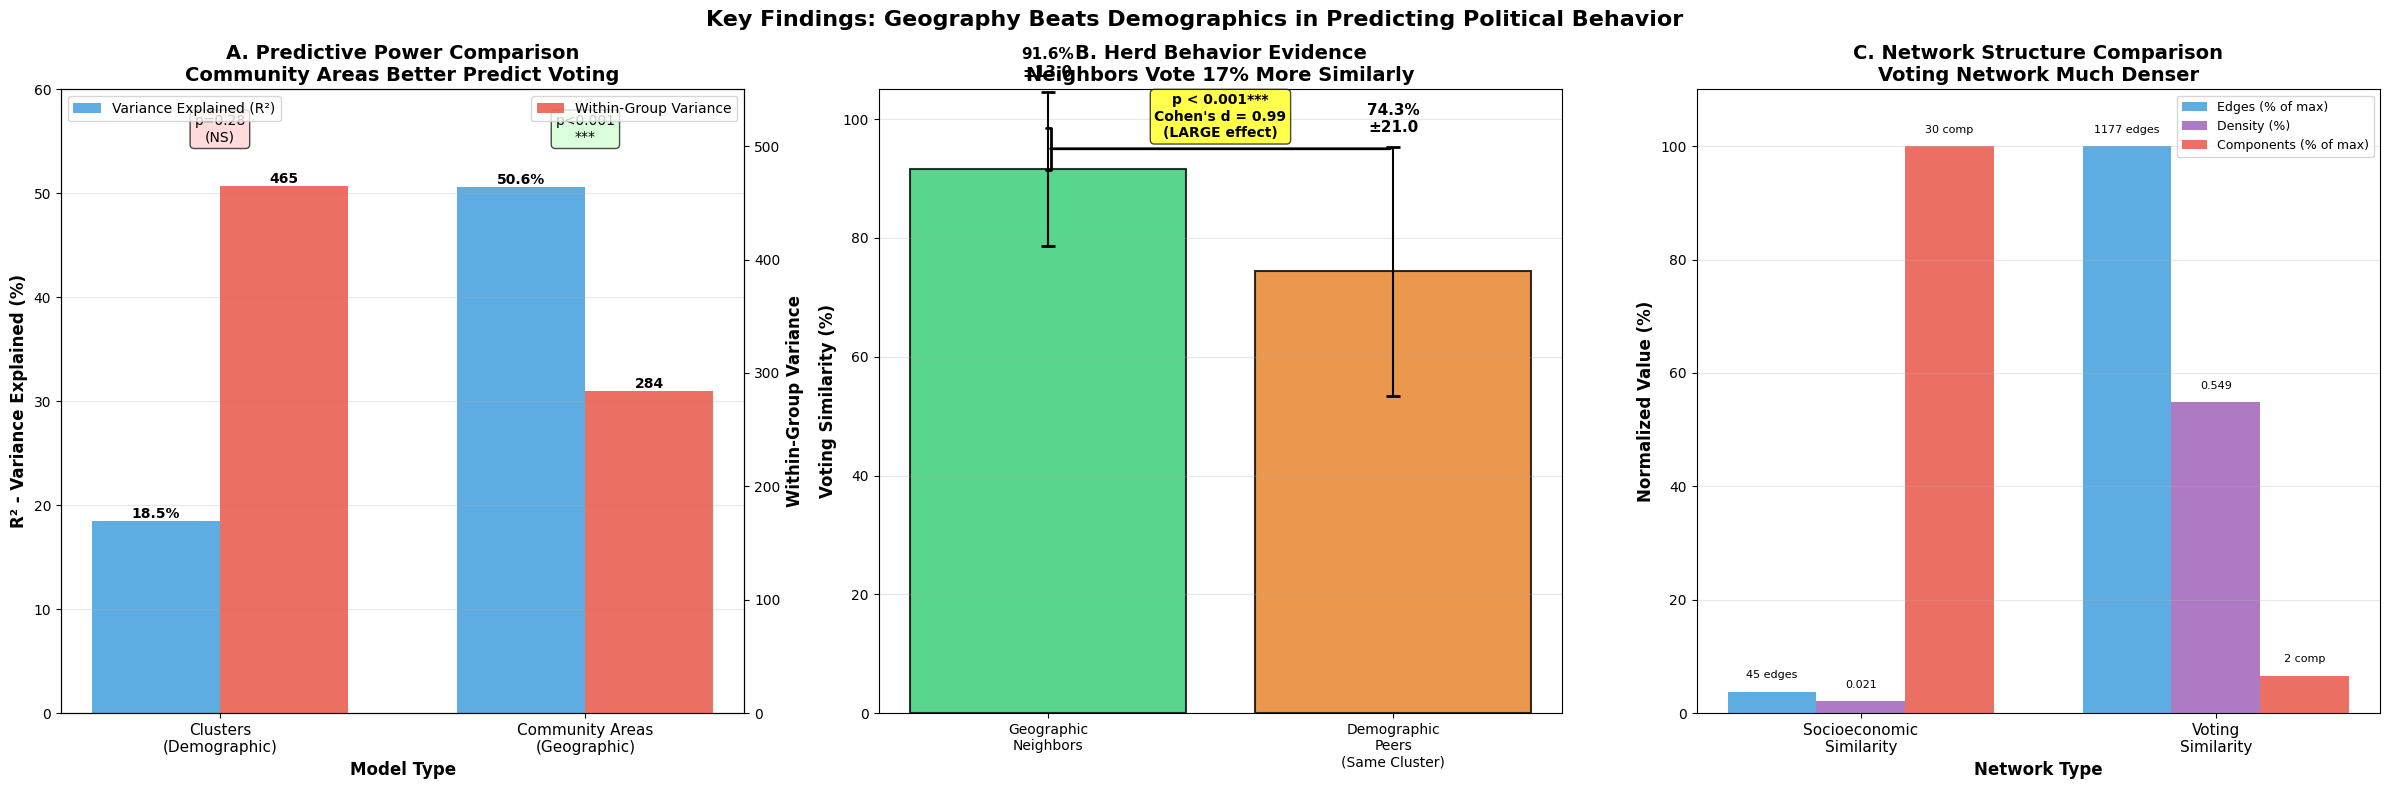

💾 Saved: summary_main_findings.png


In [34]:
import matplotlib.pyplot as plt
import numpy as np

print("🎨 Creating main summary figure...")

fig = plt.figure(figsize=(24, 8))

# ===== PANEL 1: Variance Comparison Bar Chart =====
ax1 = plt.subplot(131)

models = ['Clusters\n(Demographic)', 'Community Areas\n(Geographic)']
r_squared = [0.1851, 0.5060]
within_var = [464.83, 284.50]

x = np.arange(len(models))
width = 0.35

bars1 = ax1.bar(x - width/2, [r*100 for r in r_squared], width, 
                label='Variance Explained (R²)', color='#3498db', alpha=0.8)
ax1_twin = ax1.twinx()
bars2 = ax1_twin.bar(x + width/2, within_var, width,
                     label='Within-Group Variance', color='#e74c3c', alpha=0.8)

ax1.set_ylabel('R² - Variance Explained (%)', fontsize=12, fontweight='bold')
ax1_twin.set_ylabel('Within-Group Variance', fontsize=12, fontweight='bold')
ax1.set_xlabel('Model Type', fontsize=12, fontweight='bold')
ax1.set_title('A. Predictive Power Comparison\nCommunity Areas Better Predict Voting', 
              fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, fontsize=11)
ax1.set_ylim(0, 60)
ax1_twin.set_ylim(0, 550)

# Add values on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax1_twin.text(bar.get_x() + bar.get_width()/2., height,
                  f'{height:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add significance markers
ax1.text(0, 55, 'p=0.28\n(NS)', ha='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='#ffcccc', alpha=0.7))
ax1.text(1, 55, 'p<0.001\n***', ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='#ccffcc', alpha=0.7))

ax1.legend(loc='upper left', fontsize=10)
ax1_twin.legend(loc='upper right', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# ===== PANEL 2: Herd Behavior Comparison =====
ax2 = plt.subplot(132)

categories = ['Geographic\nNeighbors', 'Demographic\nPeers\n(Same Cluster)']
similarities = [91.60, 74.35]
errors = [12.99, 20.97]  # Standard deviations

bars = ax2.bar(categories, similarities, color=['#2ecc71', '#e67e22'], 
               alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.errorbar(categories, similarities, yerr=errors, fmt='none', 
             ecolor='black', capsize=5, capthick=2)

ax2.set_ylabel('Voting Similarity (%)', fontsize=12, fontweight='bold')
ax2.set_title('B. Herd Behavior Evidence\nNeighbors Vote 17% More Similarly', 
              fontsize=14, fontweight='bold')
ax2.set_ylim(0, 105)

# Add values on bars
for bar, val, err in zip(bars, similarities, errors):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + err + 2,
            f'{val:.1f}%\n±{err:.1f}', ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

# Add significance annotation
ax2.annotate('', xy=(0, 95), xytext=(1, 95),
            arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.3', lw=2, color='black'))
ax2.text(0.5, 97, 'p < 0.001***\nCohen\'s d = 0.99\n(LARGE effect)', 
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax2.grid(axis='y', alpha=0.3)

# ===== PANEL 3: Network Structure Comparison =====
ax3 = plt.subplot(133)

network_types = ['Socioeconomic\nSimilarity', 'Voting\nSimilarity']
edges = [45, 1177]
densities = [0.021, 0.549]
components = [30, 2]

x = np.arange(len(network_types))
width = 0.25

# Normalize for visualization (different scales)
edges_norm = [e/1177*100 for e in edges]  # Normalize to percentage of max
density_norm = [d*100 for d in densities]  # Convert to percentage

bars1 = ax3.bar(x - width, edges_norm, width, label='Edges (% of max)', 
                color='#3498db', alpha=0.8)
bars2 = ax3.bar(x, density_norm, width, label='Density (%)', 
                color='#9b59b6', alpha=0.8)
bars3 = ax3.bar(x + width, [c/30*100 for c in components], width, 
                label='Components (% of max)', color='#e74c3c', alpha=0.8)

ax3.set_ylabel('Normalized Value (%)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Network Type', fontsize=12, fontweight='bold')
ax3.set_title('C. Network Structure Comparison\nVoting Network Much Denser', 
              fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(network_types, fontsize=11)
ax3.set_ylim(0, 110)
ax3.legend(loc='upper right', fontsize=9)

# Add actual values as text
actual_labels = [
    [f'{edges[0]} edges', f'{densities[0]:.3f}', f'{components[0]} comp'],
    [f'{edges[1]} edges', f'{densities[1]:.3f}', f'{components[1]} comp']
]

for i, (bar_group, labels) in enumerate(zip([bars1, bars2, bars3], 
                                             zip(*actual_labels))):
    for j, (bar, label) in enumerate(zip(bar_group, labels)):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 2,
                label, ha='center', va='bottom', fontsize=8, rotation=0)

ax3.grid(axis='y', alpha=0.3)

plt.suptitle('Key Findings: Geography Beats Demographics in Predicting Political Behavior', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.savefig('summary_main_findings.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Saved: summary_main_findings.png")

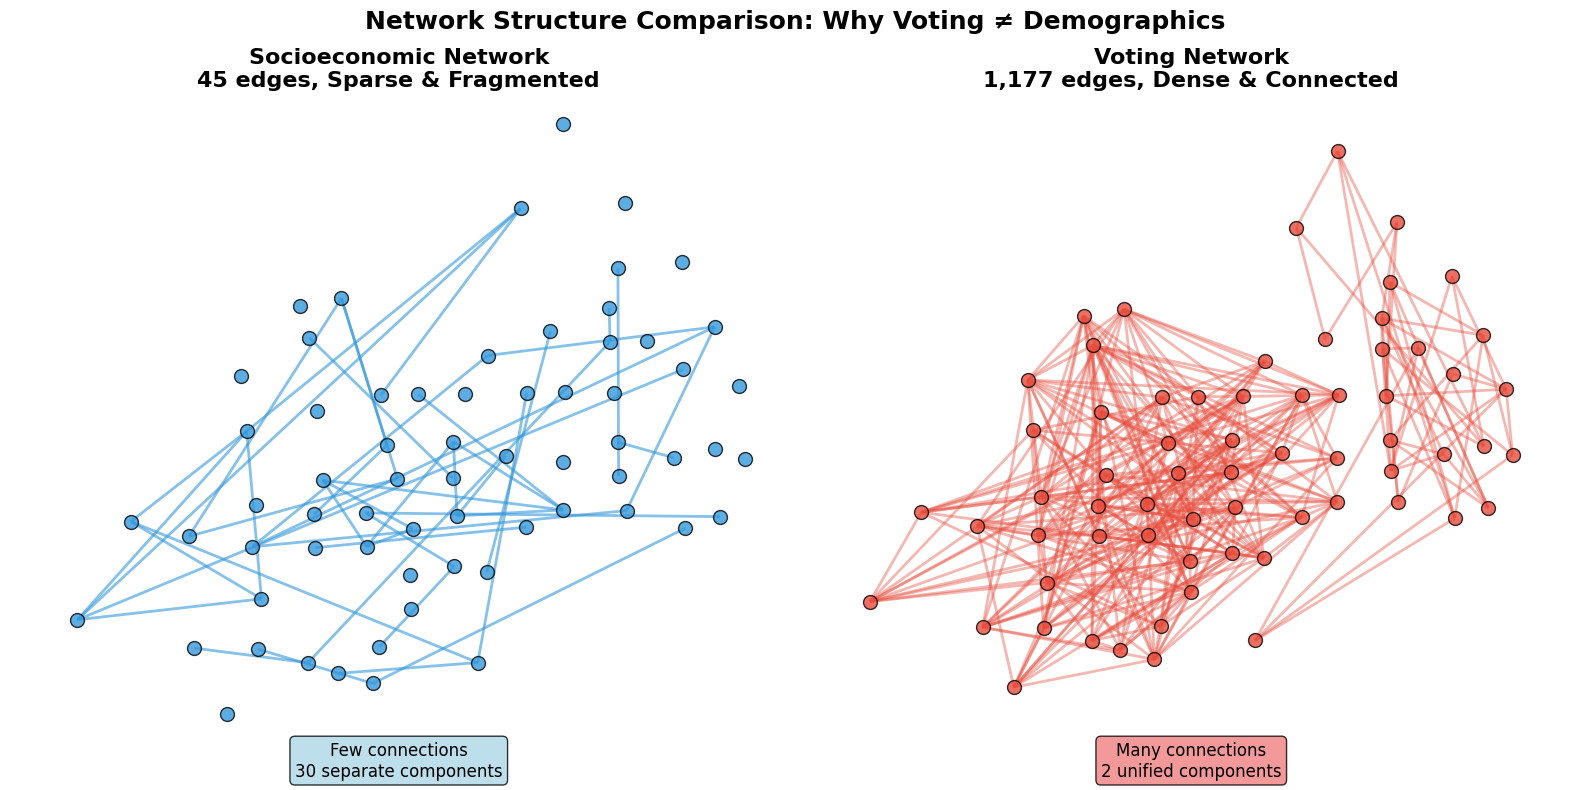

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Get positions (geographic layout)
pos = {row["GEOID"]: (row.geometry.centroid.x, row.geometry.centroid.y) 
       for _, row in bg_complete.iterrows()}

# LEFT: Socioeconomic Network (sparse)
ax1 = axes[0]
nx.draw_networkx_nodes(G_similarity, pos, node_size=100, 
                       node_color='#3498db', alpha=0.8, ax=ax1,
                       edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G_similarity, pos, edge_color='#3498db', 
                       width=2, alpha=0.6, ax=ax1)
ax1.set_title('Socioeconomic Network\n45 edges, Sparse & Fragmented', 
              fontsize=16, fontweight='bold')
ax1.axis('off')

# Add text annotation
ax1.text(0.5, -0.05, 'Few connections\n30 separate components', 
         transform=ax1.transAxes, ha='center', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# RIGHT: Voting Network (dense)
ax2 = axes[1]

# Sample edges for visibility (too many to show clearly)
edges_sample = list(G_voting.edges())
np.random.seed(42)
edges_to_draw = np.random.choice(len(edges_sample), 300, replace=False)
edges_sampled = [edges_sample[i] for i in edges_to_draw]
G_voting_sample = nx.Graph()
G_voting_sample.add_edges_from(edges_sampled)

nx.draw_networkx_nodes(G_voting, pos, node_size=100, 
                       node_color='#e74c3c', alpha=0.8, ax=ax2,
                       edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G_voting_sample, pos, edge_color='#e74c3c', 
                       width=2, alpha=0.4, ax=ax2)
ax2.set_title('Voting Network\n1,177 edges, Dense & Connected', 
              fontsize=16, fontweight='bold')
ax2.axis('off')

# Add text annotation
ax2.text(0.5, -0.05, 'Many connections\n2 unified components', 
         transform=ax2.transAxes, ha='center', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.suptitle('Network Structure Comparison: Why Voting ≠ Demographics', 
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('poster_network_comparison.png', dpi=300, bbox_inches='tight')
plt.show()